# **Auction Hunters**
## Exploratory Data Analysis Project
## **Part 2: Exploratory Data Analysis**
#### Joshua Higgins | October 2023 ~

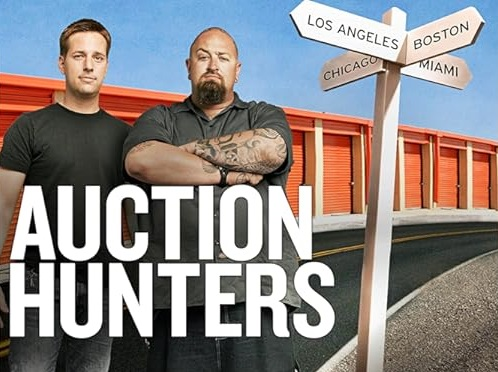

## 🙋 Did you see **Part 1 - Data Pre-processing❓**
* Check out the data collection and cleaning process 👉 [Part 1: Pre-processing!](https://github.com/Joshua-Higgins-jp/Auction_Hunters_EDA/blob/master/auction_hunters_preprocessing.ipynb)

# Objectives
* Import the cleaned data from Part 1.
* Perform an EDA on the data.
* Summarise insights from EDA.

# Questions

## **👽 UPDATE as check is completed**

#### Financial Analysis
* 1.1. What are the best and worst performing episodes per season (Paid, Sold, Profit)?
* 1.2. What are the 3 best and worst performing episodes over the entire series (Paid, Sold, Profit)?
* 1.3. What is the profit margin per episode? Top 3? Season?
* 1.4. What is the return on investment per episode? Season?
* 1.5. What is the relative Paid, Sold, Profit normalised for number of episodes per season?
   * Season and Series Averages
* 1.6. What is the rank of best performing seasons using the relative Paid, Sold, Profit, ROI and Profit Margin?

#### Location Analysis
* 2.1. How many times did Allen and Ton visit each state in Total?
* 2.2. How many times did Allen and Ton visit each state in each Season?
* 2.3. What is the monetary performance of each state over the series?
* 2.4. Which state had the best Profit Margin?
* 2.5. Which state had the best Return on Investment (ROI)?
* 2.6. Which state has the best monetary performance over the entire series?
* 2.7. Is there a correlation between State and any financial metrics?

#### Trend Analysis
* 3.1. Have the financial metrics paid, sold, profit, ROI and profit margin followed a yearly pattern?
   * e.g. Can you identify a specific time of the year where profit is high, and purchase price is low?
   * e.g. Is there a correlation between a specific time of the year and financial metrics?
* 3.2. When did the minimum financial metrics occur each year?
* 3.3. When did the maximum financial metrics occur each year?
* 3.4. Are there any anomolies betweeen different years and financial metrics?
   * e.g. profit margin is always high in march except for one instance.

#### Rating Analysis
* 4.1. What is the best episode per season?
* 4.2. What is the worst episode per season?
* 4.3. What are the top 5 episodes of the series?
* 4.4. What are the worst 5 episodes of the series?
* 4.5. Is there any correlation between the IMDB rating data and the Trakt rating data?
* 4.6. Is there any correlation between rating and location?

#### Data Science
* 5.1. NLP: Is there a relationship between episode description sentiment and viewer rating?
* 5.2. NLP: Is there a relationship between episode description sentiment and financial metrics?
* 5.3. Is there a relationship between viewer rating and financial metrics?
   * Can you predict the viewer rating from the financial metrics, and/or vice versa?

# Definitions

## **👽 UPDATE as check is completed**

* 💰 **Paid:** Refers to the amount of money paid for all of the won storage unit(s) in one episode.
* 💰 **Sold:** Refers to the amount of money made from selling the contents of the storage units they successfully won at auction.
* 💰 **Profit:** Refers to the amount of money made from selling the contents of the storage unit minus the purchase price (profit = sold - paid).
* 📊 **Relative Scale:** In this EDA, relative will usually mean normalised to a per episode or season basis.
   * 👉 e.g. relative profit by season would mean sum(profit_season_x)/num_episodes_season_x.
   * 👉 e.g. relative profit for the entire series would be the same as the average or mean, i.e. profit_all_episodes/num_all_episodes.
   * 👉 e.g. relative can also be used for state visit counts. E.g. if I visited California 6 times, the relative_profit in California would be total_profit/6.

# Imports and Globals

In [1]:
# This is needed to draw the maps inside the plots in the location analysis.
# pip install -U kaleido

In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests
import time
import random
import plotly.express as px
import os
import math
from PIL import Image
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from datetime import timedelta

In [3]:
DATA_DIR = "data"
MONETARY_COLS = ['paid_', '$sold_$', 'profit_$']
CLEANED_DATA_PICKLE = f"{DATA_DIR}/final_dataset_auction_hunters.pkl"
LOCATION_STATE_CODE_PICKLE = f"{DATA_DIR}/location_state_code_pickle.pkl"

# Importing Cleaned Data

In [4]:
# Set Pandas display options so that we can see the entire dataframe.
pd.set_option('display.max_rows', None)     # Shows all rows
pd.set_option('display.max_columns', None)  # Shows all columns
pd.set_option('display.width', None)        # Adjusts the display width

In [5]:
with open(CLEANED_DATA_PICKLE, 'rb') as file:
    df = pickle.load(file)

## Inspect the data we have imported

In [6]:
df.head(2)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,description,paid_$,sold_$,profit_$,rating,votes,api_rating,api_votes,1,2,3,4,5,6,7,8,9,10
0,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,Ton and Allen head to auctions in the desert t...,376,1190,814,7.8,34.0,7.56,55.0,1.0,0.0,0.0,1.0,1.0,10.0,14.0,13.0,6.0,9.0
1,1,2,102,The Big Score,"Downtown Los Angeles, California",2010-11-09,Ton and Allen bid on units in downtown LA and ...,2025,5850,3825,6.5,26.0,7.18,44.0,1.0,0.0,0.0,1.0,1.0,10.0,15.0,8.0,3.0,5.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   season_num    107 non-null    int8          
 1   episode_num   107 non-null    int8          
 2   unique_ep_ID  107 non-null    int16         
 3   episode_name  107 non-null    object        
 4   location      107 non-null    object        
 5   air_date      107 non-null    datetime64[ns]
 6   description   107 non-null    object        
 7   paid_$        107 non-null    int32         
 8   sold_$        107 non-null    int32         
 9   profit_$      107 non-null    int32         
 10  rating        75 non-null     float64       
 11  votes         75 non-null     float64       
 12  api_rating    105 non-null    float64       
 13  api_votes     105 non-null    float64       
 14  1             105 non-null    float64       
 15  2             105 non-null    float64   

## 🎓 `Show_me` function: Shows the dataframe record for a single episode using `unique_ep_ID`

**✈️ This is a quick and easy to use code snippet to speed up grabbing a single record**

In [8]:
def show_me(dataframe_name, unique_ep_ID):
    """
    Enter a dataframe name that contains the unique_ep_ID column and an episode number to inspect.
    The result is displayed as a dataframe.
    
    example input: show_me(df, 101)
     -> This will show the entry for episode 101 in the dataframe df.
    """
    result = dataframe_name[dataframe_name['unique_ep_ID'] == unique_ep_ID]
    return result

In [9]:
show_me(df, 101)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,description,paid_$,sold_$,profit_$,rating,votes,api_rating,api_votes,1,2,3,4,5,6,7,8,9,10
0,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,Ton and Allen head to auctions in the desert t...,376,1190,814,7.8,34.0,7.56,55.0,1.0,0.0,0.0,1.0,1.0,10.0,14.0,13.0,6.0,9.0


## **👍 Looks Good. Let's get started!**

# 1. Financial Analysis

## 1.1. What are the best and worst performing episodes per season financially (Paid, Sold, Profit)?

* **🏹 To tackle this question:**
   * 🥇 I will generate dataframes for each paid, sold and profit categories. 
   * 🥈 Each dataframe will have the best and worst episode ranked by category.
   * 🥉 Each category will be visualised in bar plots.

### 1.1.1. Generate Dataframes

In [10]:
def min_or_max_feature_by_season(dataframe, min_or_max="min", feature_col='profit_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=False):
    """
    Pass in a dataframe, specify the most_feature column, prints text for the most_feature for each season.
    min_or_max is used to select which feature to select from each season.
    
    Args:
    - dataframe (pd.DataFrame): The input dataframe.
    - min_or_max (str): Specify 'min' or 'max' to select the minimum or maximum feature from each season.
    - feature_col (str): The column representing the feature to be analyzed.
    - monetary_cols (List[str]): List of columns representing monetary values.
    - season_col (str): The column representing the season number.
    - show_table (bool): If True, print a table showing the results for each season.
    
    Returns:
    - pd.DataFrame: A dataframe containing the output values for each season.

    Examples:
    result = min_or_max_feature_by_season(dataframe=df, feature_col='profit_$', show_table=True)

    Unit is for monetary values $. If None, then no unit. Else, it will print the output sentence with your unit.
    """
    if min_or_max not in ["min", "max"]:
        raise ValueError("min_or_max argument must be 'min' or 'max'. Check input and try again.")
    
    feature_by_season_list_of_dicts = []
    
    df0 = dataframe.copy()
    season_num_list = df0[season_col].unique()
    
    for season in season_num_list:
        season_df = df0[df0[season_col] == season]
        feature_id = season_df[feature_col].idxmax() if min_or_max == "max" else season_df[feature_col].idxmin()
        feature_ep_ID = season_df.loc[feature_id, 'unique_ep_ID']
        feature_episode_name = season_df.loc[feature_id, 'episode_name']
        feature_value = season_df.loc[feature_id, feature_col]
        #feature_location = season_df.loc[feature_id, 'location']
        
        ep_dict = {
            'season_num': season,
            'unique_ep_ID': feature_ep_ID,
            'episode_name': feature_episode_name,
            #'location': feature_location,
            feature_col: feature_value
        }
        
        if feature_col in monetary_cols:
            unit = '$'
        else:
            unit = None
        
        feature_by_season_list_of_dicts.append(ep_dict)
    
    result_df = pd.DataFrame.from_records(feature_by_season_list_of_dicts, index=['season_num'])
    
    if show_table is True:
        if min_or_max == "min": 
            print(f"\n💸 {min_or_max.capitalize()} {feature_col}:")
        if min_or_max == "max":
            print(f"\n🥇 {min_or_max.capitalize()} {feature_col}:")
        print(result_df.reset_index())
        print("--------------------------------------------------------------------")
    
    # This allows the season_num column to be accessed as a column later :)
    return result_df.reset_index() 

In [11]:
max_paid_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="max", feature_col='paid_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
min_paid_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="min", feature_col='paid_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
max_sold_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="max", feature_col='sold_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
min_sold_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="min", feature_col='sold_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
max_profit_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="max", feature_col='profit_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
min_profit_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="min", feature_col='profit_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)


🥇 Max paid_$:
   season_num  unique_ep_ID          episode_name  paid_$
0           1           105        The Real Thing    2450
1           2           204        Disco and Dice    3450
2           3           301  Auction Hunters Live    5000
3           4           423  Cashville, Tennessee   12800
4           5           509    Louisiana Purchase   16500
--------------------------------------------------------------------

💸 Min paid_$:
   season_num  unique_ep_ID                 episode_name  paid_$
0           1           106  Weapons of Past Destruction     295
1           2           218                Viva la Vegas     320
2           3           307              High Flying Ton     450
3           4           412            Don't Taze Me Bro       5
4           5           506                Risk & Reward     410
--------------------------------------------------------------------

🥇 Max sold_$:
   season_num  unique_ep_ID            episode_name  sold_$
0           1      

### 1.1.2. Visualising the Data

In [12]:
def plot_min_max_ep_by_season(min_df, max_df, category: str):
    """
    Use the function min_or_max_feature_by_season to generate your min_dfs and max_dfs. 
    This will return you a df with 5 rows, featuring 1 episode from each season with the min or max category.
    Then, pass through your category string ["paid", "sold", "profit", "roi", "profit margin", "rating", "api rating"] for the plot labels.
    """
    
    ax_font_size = 10
    title_font_size = 12
    annot_font_size = 8
    ax_ticks_font_size = 8
    
    if category not in ["paid", "sold", "profit", "roi", "profit margin", "rating", "api rating"]:
        raise ValueError('min_or_max argument must be "paid", "sold", "profit", "roi", "profit margin", "rating", "api rating". Check input and try again.') 
        
    cat_to_col_dict = {"paid":"paid_$", 
                       "sold":"sold_$", 
                       "profit":"profit_$",
                       "roi": "roi_%",
                       "profit margin": "profit_margin_%",
                       "rating": "rating",
                       "api rating":"api_rating"}
    
    x_col = cat_to_col_dict[category]
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))
    
    # Plot minimum values on the left subplot
    ax1 = sns.barplot(x=x_col, 
                     y="season_num", 
                     data=min_df, 
                     hue="season_num", 
                     dodge=False, 
                     orient='h',
                     palette="Set1",
                     ax=axes[0],
                     edgecolor="black")
    
    ##### LEFT MIN PLOT ######

    for index, row in min_df.iterrows():
        ax1.text(row[x_col], 
                 index, 
                 f" Ep# {row['unique_ep_ID']} (${row[x_col]:,.0f})\n {row['episode_name']}", 
                 va='center').set_fontsize(annot_font_size)

    ax1.set_xlabel(f"{category.capitalize()} ($)", fontsize=ax_font_size, weight="bold")
    ax1.set_ylabel('Season #', fontsize=ax_font_size, weight="bold")
    ax1.set_title(f"Auction Hunters: Episodes of Min {category.capitalize()}", weight='bold', fontsize=title_font_size)
    # ax1.set_xlim(0, min_df[x_col].max() + 10000)
    ax1.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)

    if min_df[x_col].min() > 0:
        ax1.set_xlim(0.75*min_df[x_col].min(), 1.50*min_df[x_col].max())
    else:
        ax1.set_xlim(1.25*min_df[x_col].min(), 1.50*min_df[x_col].max())

    ax1.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

    ##### RIGHT MAX PLOT ######

    ax2 = sns.barplot(x=x_col, 
                     y="season_num", 
                     data=max_df, 
                     hue="season_num", 
                     dodge=False, 
                     orient='h',
                     palette="Set1",
                     ax=axes[1],
                     edgecolor="black")

    for index, row in max_df.iterrows():
        ax2.text(row[x_col], 
                 index, 
                 f" Ep# {row['unique_ep_ID']} (${row[x_col]:,.0f})\n {row['episode_name']}", 
                 va='center').set_fontsize(annot_font_size)

    ax2.set_xlabel(f"{category.capitalize()} ($)", fontsize=ax_font_size, weight="bold")
    ax2.set_ylabel('Season #', fontsize=ax_font_size, weight="bold")
    ax2.set_title(f"Auction Hunters: Episodes of Max {category.capitalize()}", weight='bold', fontsize=title_font_size)
    ax2.set_xlim(0, 1.5*max_df[x_col].max())
    ax2.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)

    ax2.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    
    plt.tight_layout()
    plt.show()

#### 1.1.2.1. Min and Max Paid by Season

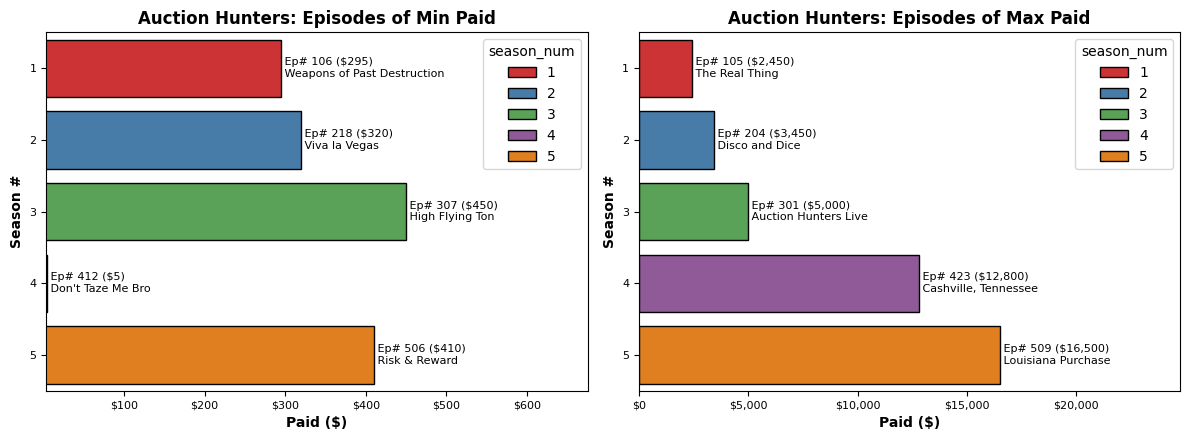

In [13]:
plot_min_max_ep_by_season(min_df=min_paid_ep_by_season_df,
                          max_df=max_paid_ep_by_season_df,
                          category="paid")

#### **⚖️ Remarks**
* 🕵️ The single min and max paid for storage units by season generally increases.
* 🕵️ Season 4 - episode 412 breaks the trend with a minimum $5 purchase.
   * If something valuable was in this unit, this could mean a very high profit and profit margin!
   * This incredibly low price is an anomoly, which we will see shortly.

#### 1.1.2.2. Min and Max Sold by Season

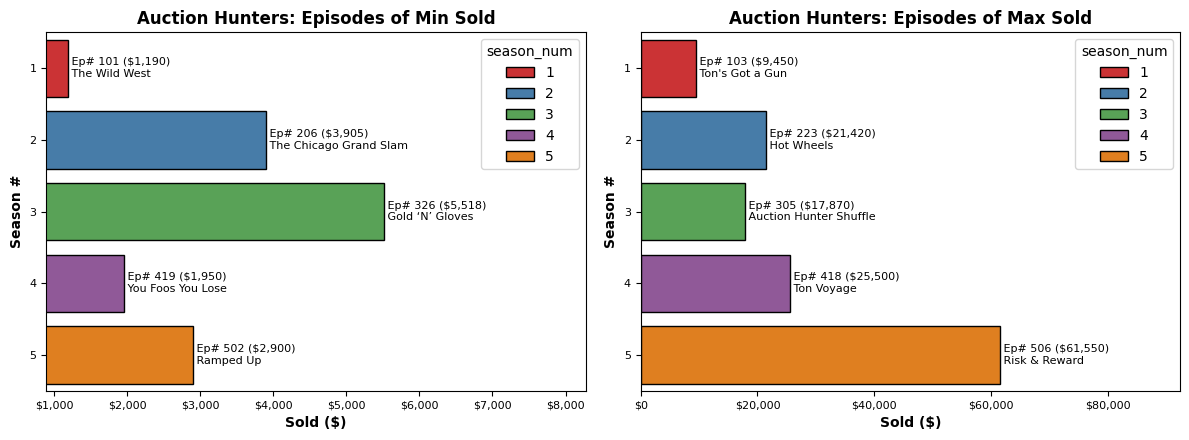

In [14]:
plot_min_max_ep_by_season(min_df=min_sold_ep_by_season_df,
                          max_df=max_sold_ep_by_season_df,
                          category="sold")

#### **⚖️ Remarks**
* 🕵️ The single min and max sold for storage units by season generally increases with the max, but varies for the min.
* 🕵️ Just going off the plots, the max-max value is about 5-6x the min-min value.

#### 1.1.2.3. Min and Max Profit by Season

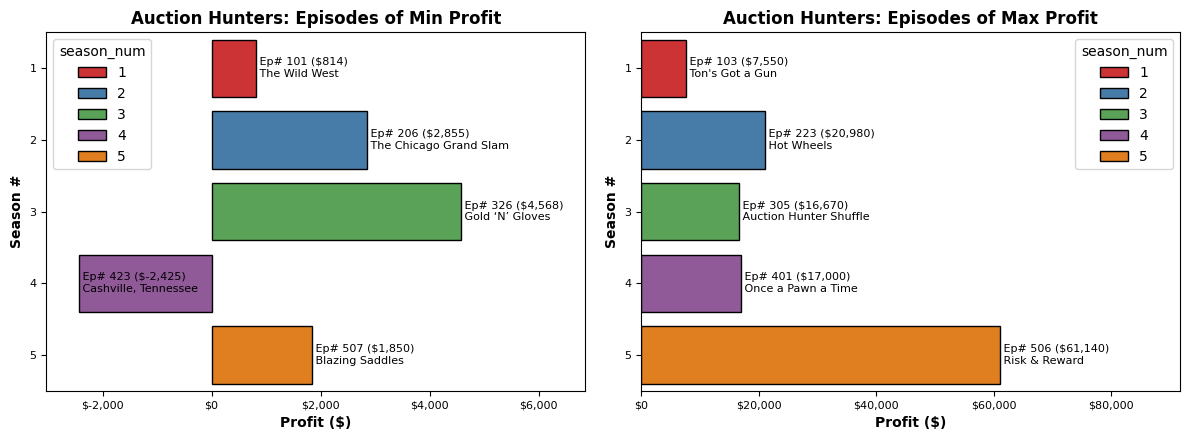

In [15]:
plot_min_max_ep_by_season(min_df=min_profit_ep_by_season_df,
                          max_df=max_profit_ep_by_season_df,
                          category="profit")

#### **⚖️ Remarks**
* 🕵️ The single min and max profit for storage units by season somewhat increases with the max, but varies greatly for the min.
* 🕵️ Season 4 - Episode 23 has a negative mininmum profit!
   * This indicates that too much money was paid for the unit, or the contents weren't as valuable as expected, or both. 
* 🕵️ Let's investigate episode 423 and 506 👇👇

In [16]:
# 423
print(df.loc[df['unique_ep_ID'] == 423, 'description'].values[0])

Ton and Allen hit the road for Nashville, where they rumble with a band of tough, high-bidding bikers. The day explodes when the guys discover a 37 millimeter anti-tank gun and a cowboy’s rodeo saddle.


In [17]:
show_me(df, 423)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,description,paid_$,sold_$,profit_$,rating,votes,api_rating,api_votes,1,2,3,4,5,6,7,8,9,10
83,4,23,423,"Cashville, Tennessee","Nashville, Tennessee",2014-03-29,"Ton and Allen hit the road for Nashville, wher...",12800,13375,-2425,NaN,NaN,7.9,30.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,13.0,3.0,4.0


`From Part 1:`
**📺 Episode 423**
   * This episode included the cost of travel in the paid value, but it is not shown in the table. Paid 12800 + travel 3000 = 15800. Sold 13375.
   * The negative profit_$ is due to the 3000 dollar travel expense.

In [18]:
# 506
print(df.loc[df['unique_ep_ID'] == 506, 'description'].values[0])

The guys arrive late to an auction and uncover vintage bear traps and a collection of street art possibly belonging to graffiti artist RISK.


* The high profit is due to finding an art piece from a famous artist, who lived locally in california and he authenticated the work which raised its value.

## 1.2. What are the 3 best and worst performing episodes for the entire series (Paid, Sold, Profit)?

* **🏹 To tackle this question:**
   * 🥇 Show the entire series data for each category. 
   * 🥈 Create dataframes ranking each category.
   * 🥉 Each category will be visualised in Line Plots and Bar Plots.

### 1.2.1. Paid, Sold, Profit Categories for Series - Visualisation

In [19]:
def show_basic_feature_plot(dataframe, feature_col, unit):
    """
    Takes a dataframe with 'season_num', 'unique_ep_ID' and other monetary feature column with $ units and plots them, index vs. feature_col.
    """
    
    if unit not in ["$", "%"]:
        raise ValueError("Unit must be '$' or '%'. Check input and try again.") 
        
    df = dataframe

    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=df, x=df.index, y=feature_col, hue='season_num', palette='Set1')

    # Initialize a counter to keep track of the episode index across seasons
    episode_counter = 0

    # Annotate the line with unique_ep_ID
    for line in ax.lines:
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        for x, y in zip(x_data, y_data):
            unique_ep_ID = df.loc[episode_counter, 'unique_ep_ID']
            ax.annotate(f'{unique_ep_ID}', (x, y), textcoords='offset points', xytext=(0, 10), ha='center', fontsize=6)
            episode_counter += 1  # Increment the episode counter

    plt.xlabel('Episode Index (Number)', weight='bold')
    plt.ylabel(f"{feature_col.capitalize()}", weight='bold')
    plt.title(f"Auction Hunters: {feature_col.capitalize()} vs. Episode Index (with unique_ep_ID annotations)", weight='bold', fontsize=15)
    plt.legend(title='Season')

    # Add more gridlines
    ax.set_xticks(range(0, len(df), 10))

    # Format y-axis labels with comma separator
    axis_format = '${x:,.0f}' if unit == "$" else '{x:,.0f}%'
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(axis_format))

    plt.grid(True)  # Add grid lines to both x and y axes
    plt.tight_layout()
    plt.show()

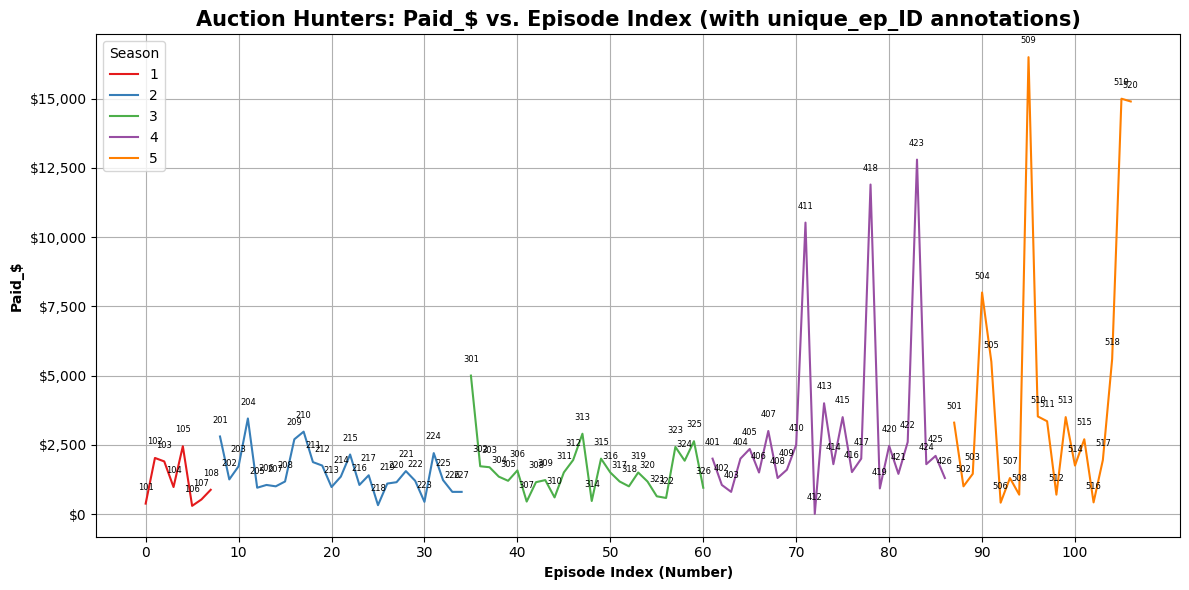

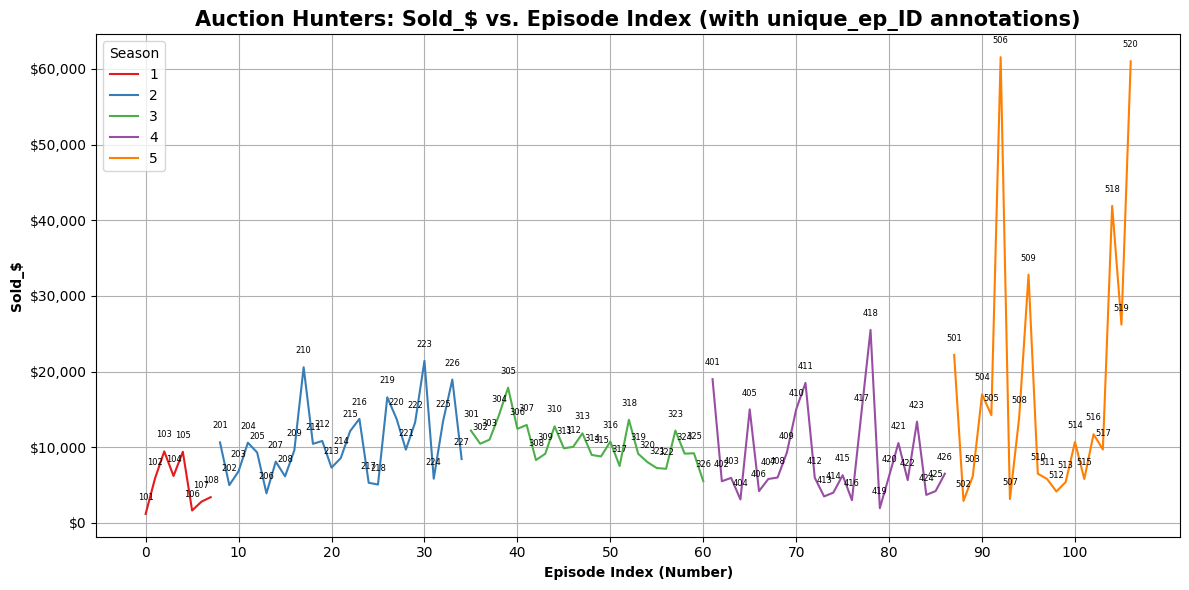

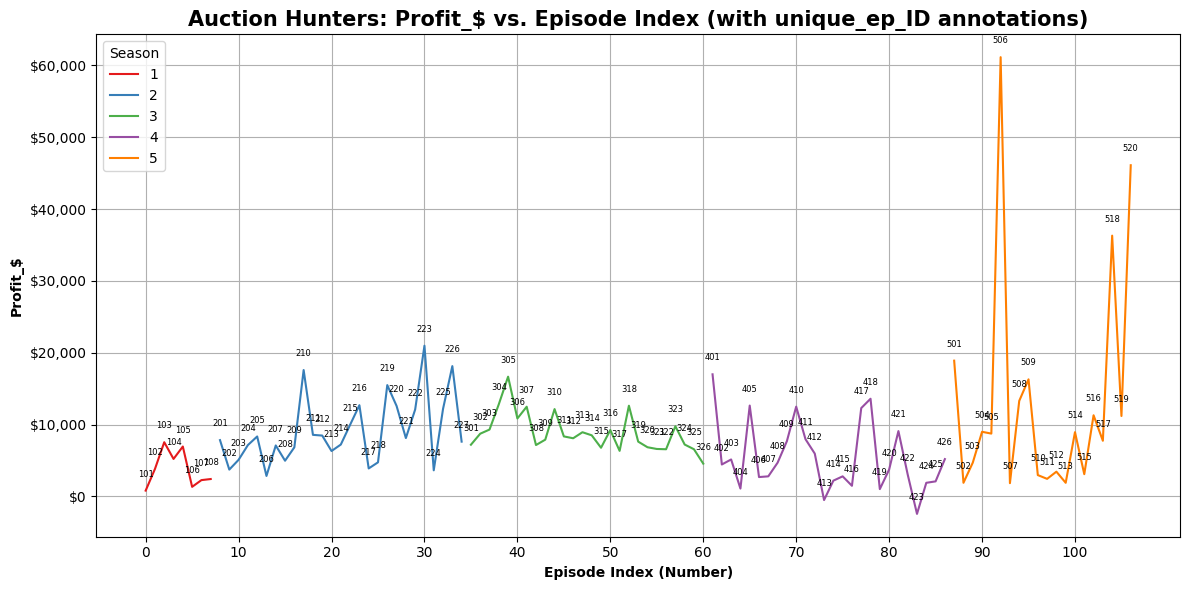

In [20]:
list_of_features_to_plot = ['paid_$', 'sold_$', 'profit_$']
for feature in list_of_features_to_plot:
    show_basic_feature_plot(df, feature, "$")

#### **⚖️ Remarks**
* 🕵️ All 3 financial metrics have larger peaks in seasons 4 and 5 compared to the previous 3 seasons.
     * This shows a larger variance as the seasons progress.
* 🕵️ As we will see later, these spikes will be identified as outliers.

### 1.2.2. What are the 3 Best / Worst for each monetary category in the entire series?

#### 1.2.2.1. First, I will make a simplified dataframe

In [21]:
financial_cols = ['season_num', 'episode_num', 'unique_ep_ID','episode_name','location','air_date', 'paid_$', 'sold_$', 'profit_$']
df_threes = df.loc[:, financial_cols]

#### 1.2.2.2. Then, I will preprare a plotting function

In [22]:
def plot_best_worst_three_eps(worst_df, best_df, category: str, left_caption, right_caption, left_legend_pos="best", right_legend_pos="best", datatype="finance"):
    """
    After specifying the worst and best dataframes, you must specify the category argument as 'paid', 'sold' or 'profit', profit_margin or roi.    
    You need to add a caption to the left and right graph as appropriate.
    If you need to manually change the legend position, use any of the following arguments: 
    "upper right", "upper left", "lower left", "lower right", "right", "center left", "center right", "lower center", "upper center", "center"
    """
    
    ax_font_size = 10
    title_font_size = 12
    annot_font_size = 8
    ax_ticks_font_size = 8
    
    cat_to_col_dict = {
        "paid":"paid_$", 
        "sold":"sold_$", 
        "profit":"profit_$",
        "profit_margin": "profit_margin_%",
        "roi": "roi_%"
    }
    
    units_dict = {
        "paid":"$", 
        "sold":"$", 
        "profit":"$",
        "profit_margin": "%",
        "roi": "%"
    }  
    
    if category not in cat_to_col_dict.keys():
        raise ValueError("Category argument must be 'paid', 'sold' or 'profit', profit_margin or roi. Check input and try again.") 
        
    x_col = cat_to_col_dict[category]
    ylabels = ['1st', '2nd', '3rd']
    units = "$" if units_dict[category] == "$" else "%"  # Define units based on the condition
    axis_format = '${x:,.0f}' if units == "$" else '{x:,.0f}%'

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    
    ##### LEFT MIN PLOT ######

    # 1. Plot minimum values on the left subplot
    ax1 = sns.barplot(x=x_col, 
                     y=ylabels, 
                     data=worst_df, 
                     hue=ylabels, 
                     dodge=False, 
                     orient='h',
                     palette=['#3C76B9','#558EB4','#859DAD'],
                     # palette="Set2",
                     ax=axes[0],
                     edgecolor='black')
    
    # 2. Plot the annotations on the plot 
    if datatype == "finance":
        for index, row in worst_df.iterrows():
            value_min = f"${row[x_col]:,.0f}" if units == "$" else f"{row[x_col]:,.2f}%"  # Format the value based on units
            ax1.text(row[x_col], index, f" Ep# {row['unique_ep_ID']} ({value_min})\n {row['episode_name']}", va='center').set_fontsize(annot_font_size)
    elif datatype == "states":
        for index, row in worst_df.iterrows():
            value_worst = f"${row[x_col]:,.0f}" if units == "$" else f"{row[x_col]:,.2f}%"  # Format the value based on units
            ax1.text(row[x_col], index, f" {row['state_name']} ({row['state_code']})\n {row['visits']} visits @ {value_worst}", va='center').set_fontsize(annot_font_size)
    else:
        print("datatype not recognised, so no labels")
    
    # 3. Plot the decorators and specify the formatting
    ax1.set_xlabel(f"{category.capitalize()} ({units})", fontsize=ax_font_size, weight="bold")
    ax1.set_ylabel('Ranking', fontsize=ax_font_size, weight="bold")
    ax1.set_title(f"Auction Hunters: {left_caption}", weight='bold', fontsize=title_font_size)
    # ax1.set_xlim(0, min_df[x_col].max() + 10000)
    ax1.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)
    ax1.xaxis.set_major_formatter(mtick.StrMethodFormatter(axis_format))
    ax1.legend(loc=left_legend_pos)

    # 4. For the minimum only, with potential negative numbers, specify the plotting range.
    if worst_df[x_col].min() > 0:
        ax1.set_xlim(0.70*worst_df[x_col].min(), 1.25*worst_df[x_col].max())
    else:
        ax1.set_xlim(1.25*worst_df[x_col].min(), 1.25*worst_df[x_col].max())
 
    ##### RIGHT MAX PLOT ######
    
    # 1. Plot minimum values on the left subplot
    ax2 = sns.barplot(x=x_col, 
                     y=ylabels, 
                     data=best_df, 
                     hue=ylabels, 
                     dodge=False, 
                     orient='h',
                     palette=['#D1495B','#E9724C','#FFC857'],
                     # palette="Set2",
                     ax=axes[1],
                     edgecolor='black')
    
    # 2. Plot the annotations on the plot 
    if datatype == "finance":
        for index, row in best_df.iterrows():
            value_best = f"${row[x_col]:,.0f}" if units == "$" else f"{row[x_col]:,.2f}%"  # Format the value based on units
            ax2.text(row[x_col], index, f" Ep# {row['unique_ep_ID']} ({value_best})\n {row['episode_name']}", va='center').set_fontsize(annot_font_size)
    elif datatype == "states":
        for index, row in best_df.iterrows():
            value_best = f"${row[x_col]:,.0f}" if units == "$" else f"{row[x_col]:,.2f}%"  # Format the value based on units
            ax2.text(row[x_col], index, f" {row['state_name']} ({row['state_code']})\n {row['visits']} visits @ {value_best}", va='center').set_fontsize(annot_font_size)
    
    # 3. Plot the decorators and specify the formatting
    ax2.set_xlabel(f"{category.capitalize()} ({units})", fontsize=ax_font_size, weight="bold")
    ax2.set_ylabel('Ranking', fontsize=ax_font_size, weight="bold")
    ax2.set_title(f"Auction Hunters: {right_caption}", weight='bold', fontsize=title_font_size)
    ax2.set_xlim(0, 1.60* best_df[x_col].max())
    ax2.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)
    ax2.xaxis.set_major_formatter(mtick.StrMethodFormatter(axis_format))
    ax2.legend(loc=right_legend_pos)

    plt.tight_layout()
    plt.show()

#### 1.2.2.1. The 3 "Best" Performing: Paid. i.e. **3 Cheapest Purchased Units**

In [23]:
df_3best_paid = df_threes.sort_values(by='paid_$', ascending=True).head(3).reset_index(drop=True)
df_3best_paid

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
0,4,12,412,Don't Taze Me Bro,"Stanton, California",2013-04-13,5,5970,5965
1,1,6,106,Weapons of Past Destruction,"Sunset Boulevard, California",2010-12-07,295,1635,1340
2,2,18,218,Viva la Vegas,"Henderson, Nevada",2011-08-30,320,5070,4750


#### 1.2.2.2. The 3 "Worst" Performing: Paid i.e. **3 Most Expensive Purchased Units**

In [24]:
df_3worst_paid = df_threes.sort_values(by='paid_$', ascending=False).head(3).reset_index(drop=True)
df_3worst_paid

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
0,5,9,509,Louisiana Purchase,"New Orleans, Louisiana",2014-12-20,16500,32800,16300
1,5,19,519,Brew-Phoria,"Mission Hills, California",2015-05-09,15000,26200,11200
2,5,20,520,Catch My Drift?,"Norwalk, California",2015-05-09,14900,61000,46100


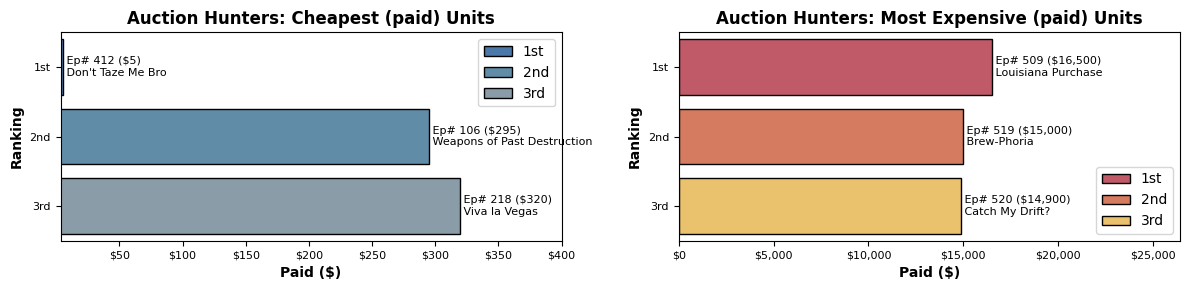

In [25]:
plot_best_worst_three_eps(df_3best_paid, df_3worst_paid, "paid", "Cheapest (paid) Units", "Most Expensive (paid) Units", "best", "lower right")

#### **⚖️ Remarks**
* 🕵️ The 3 cheapest units vary in season and value, but all in the low hundreds.
* 🕵️ The 3 most expensive units are all from mid-to-late season 5 circa $15,000+.

#### 1.2.2.3. The 3 "Best" Performing: Sold. i.e. **3 Highest Valued Content Units**

In [26]:
df_3best_sold = df_threes.sort_values(by='sold_$', ascending=False).head(3).reset_index(drop=True)
df_3best_sold

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
0,5,6,506,Risk & Reward,"Mission Hills, California",2014-11-22,410,61550,61140
1,5,20,520,Catch My Drift?,"Norwalk, California",2015-05-09,14900,61000,46100
2,5,18,518,Haff-Inated,"Valencia, California",2015-05-02,5600,41900,36300


#### 1.2.2.4. The 3 "Worst" Performing: Sold. i.e. **3 Lowest Valued Content Units**

In [27]:
df_3worst_sold = df_threes.sort_values(by='sold_$', ascending=True).head(3).reset_index(drop=True)
df_3worst_sold

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
0,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,376,1190,814
1,1,6,106,Weapons of Past Destruction,"Sunset Boulevard, California",2010-12-07,295,1635,1340
2,4,19,419,You Foos You Lose,"West Los Angeles, California",2014-02-22,925,1950,1025


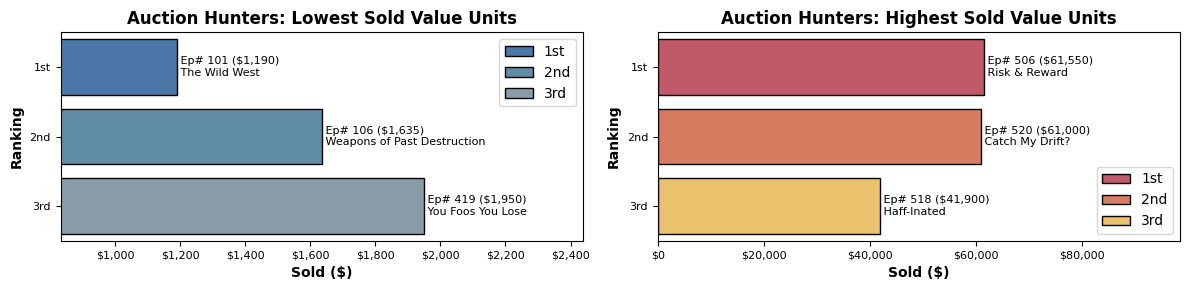

In [28]:
plot_best_worst_three_eps(df_3worst_sold, df_3best_sold, "sold", "Lowest Sold Value Units", "Highest Sold Value Units", "best", "lower right")

#### **⚖️ Remarks**
* 🕵️ The 3 lowest sold units were worth under $2000, and to see a season 4 episode there is unusual as we expect to see increasing returns with time as experience.
* 🕵️ Again, the 3 highest sold value units come from season 5 peaking at upwards of 61,000 dollars!

#### 1.2.2.5. The 3 "Best" Performing: Profit. i.e. **3 Highest Profit Units**

In [29]:
df_3best_profit = df_threes.sort_values(by='profit_$', ascending=False).head(3).reset_index(drop=True)
df_3best_profit

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
0,5,6,506,Risk & Reward,"Mission Hills, California",2014-11-22,410,61550,61140
1,5,20,520,Catch My Drift?,"Norwalk, California",2015-05-09,14900,61000,46100
2,5,18,518,Haff-Inated,"Valencia, California",2015-05-02,5600,41900,36300


#### 1.2.2.6. The 3 "Worst" Performing: Profit. i.e. **3 Lowest Profit Units**

In [30]:
df_3worst_profit = df_threes.sort_values(by='profit_$', ascending=True).head(3).reset_index(drop=True)
df_3worst_profit

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
0,4,23,423,"Cashville, Tennessee","Nashville, Tennessee",2014-03-29,12800,13375,-2425
1,4,13,413,The Fall Guys,"Reseda, Los Angeles, California",2013-04-13,4000,3500,-500
2,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,376,1190,814


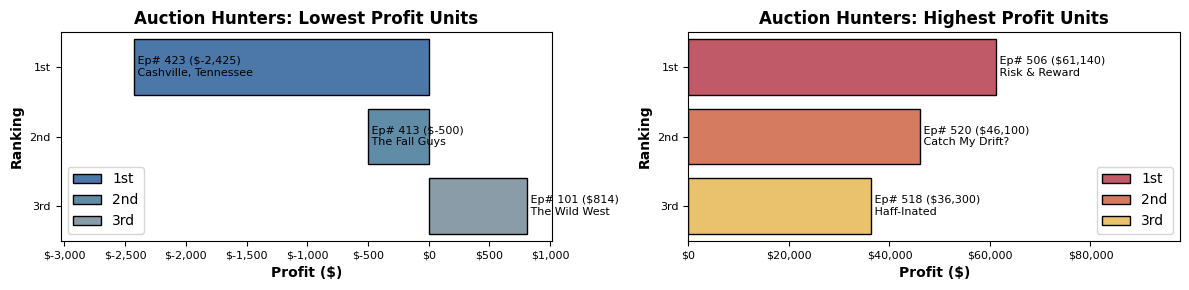

In [31]:
plot_best_worst_three_eps(df_3worst_profit, df_3best_profit, "profit", "Lowest Profit Units", "Highest Profit Units", "best", "lower right")

#### **⚖️ Remarks**
* 🕵️ Unlucky season 4 having 2 negative profit episodes combined at almost -3000 dollars.
* 🕵️ Again, the 3 highest profit value units come from season 5 peaking at upwards of 61,000 dollars!

## 1.3. What is the Profit Margin per episode?

* **🏹 To tackle this question:**
   * 🥇 Define the profit_margin_% (PM) measure and add it to the dataframe.
   * 🥈 Visualise the PM data and distribution.

* 📊 Profit Margin is the % amount of money that a business keeps after expenses.
* 📊 Simply put, profit margin is the profit to revenue ratio expressed as **(profit / revenue)\*100**.

In [32]:
df_pm_roi = df.loc[:, financial_cols]
df_pm_roi['profit_margin_%'] = round((df['profit_$'] / df['sold_$']) * 100, 2)
df_pm_roi.head(1)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%
0,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,376,1190,814,68.4


### 1.3.1. Visualise the Data

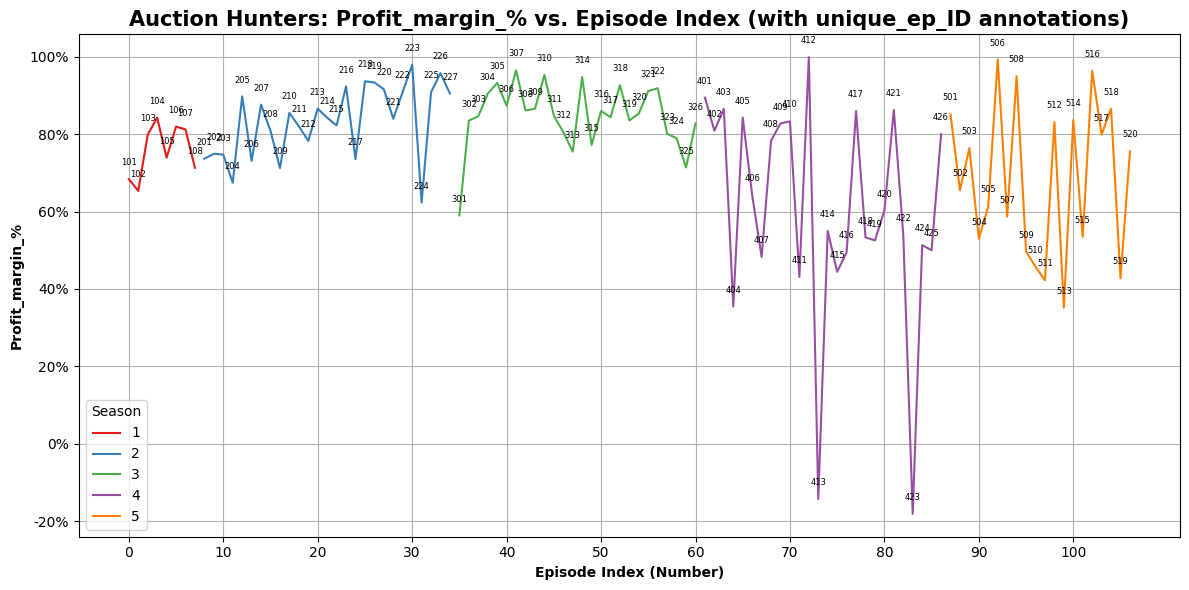

In [33]:
show_basic_feature_plot(dataframe=df_pm_roi, feature_col='profit_margin_%', unit="%")

#### **⚖️ Remarks**
* 🕵️ As expected from the 2 lowest profits occuring in season 4, the profit margin for those episodes is negative.
* 🕵️ However, season 4 and 5 for that matter also have some of the best profit margins.
* 🕵️ Some episodes in season 2 and 3 such as 223 and 307 appear close to 100 percent profit margin.

### 1.3.2. What are the 3 Highest Profit Margin Episodes?

In [34]:
df_3best_profit_margin = df_pm_roi.sort_values(by='profit_margin_%', ascending=False).head(3).reset_index(drop=True)
df_3best_profit_margin

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%
0,4,12,412,Don't Taze Me Bro,"Stanton, California",2013-04-13,5,5970,5965,99.92
1,5,6,506,Risk & Reward,"Mission Hills, California",2014-11-22,410,61550,61140,99.33
2,2,23,223,Hot Wheels,"Palm Springs, California",2011-11-01,440,21420,20980,97.95


### 1.3.3. What are the 3 Lowest Profit Margin Episodes?

In [35]:
df_3worst_profit_margin = df_pm_roi.sort_values(by='profit_margin_%', ascending=True).head(3).reset_index(drop=True)
df_3worst_profit_margin

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%
0,4,23,423,"Cashville, Tennessee","Nashville, Tennessee",2014-03-29,12800,13375,-2425,-18.13
1,4,13,413,The Fall Guys,"Reseda, Los Angeles, California",2013-04-13,4000,3500,-500,-14.29
2,5,13,513,Wreck-Shaw,"Santa Clarita, California",2015-04-18,3500,5400,1900,35.19


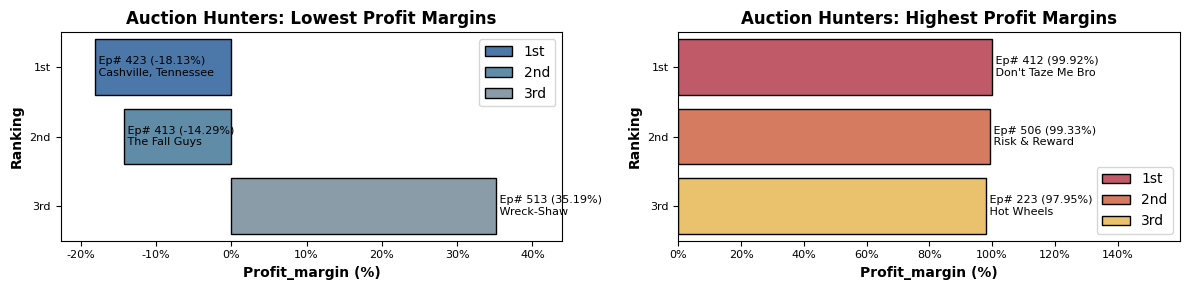

In [36]:
plot_best_worst_three_eps(df_3worst_profit_margin, df_3best_profit_margin, "profit_margin", "Lowest Profit Margins", "Highest Profit Margins", "upper right", "lower right")

#### **⚖️ Remarks**
* 🕵️ The profit margin gap from the lowest 2 to the 3rd lowest is very large. 
    * It shows that aside from those 2 episodes which had storage units that lost money, the lowest profit margins after that are at least 35%.
* 🕵️ The 3 highest profit margins are almost 100 percent!
    * If we changed from 2 to 1 decimal places, we would have the top 3 profit margins between 98.0 ~ 99.9%

### 1.3.4. What is the average profit margin for the entire series?

In [37]:
average_profit_margin = round(df_pm_roi.loc[:,'profit_margin_%'].mean(), 1)
print(f"📈 The Average Profit Margin for the entire Auction Hunters Series is: {average_profit_margin}%.")

📈 The Average Profit Margin for the entire Auction Hunters Series is: 74.7%.


### 1.3.5. What is the average profit margin per season?

In [38]:
average_profit_margin_by_season = df_pm_roi.groupby('season_num')['profit_margin_%'].mean().reset_index()
average_profit_margin_by_season['profit_margin_%'] = average_profit_margin_by_season['profit_margin_%'].round(1)
average_profit_margin_by_season

,season_num,profit_margin_%
0,1,75.8
1,2,83.3
2,3,84.8
3,4,60.3
4,5,68.4


#### 1.3.5.1. Let's visualise that season average profit margin data

In [39]:
def show_violin_plot_profit_margin(dataframe, average_profit_margin_float: float):
    """
    This function draws a profit margin graph taking a dataframe with 5 seasons vs profit_margin_% column.
    Then, it takes in the series_average
    """
    
    plt.figure(figsize=(12, 6))

    colors = sns.color_palette("Set1", n_colors=len(dataframe['season_num'].unique()))
    ax = sns.violinplot(data=dataframe, x='season_num', y='profit_margin_%', palette=colors, inner="point", cut=0)
    
    for violin in ax.collections:
        violin.set_edgecolor('black')

    plt.axhline(y=average_profit_margin_float, color='red', linestyle='--', label=f'Series Mean {average_profit_margin_float.round(1)}%')
    # plt.text(0.5, avg_pm_series, f'Series Average: {avg_pm_series:.1f}%', ha='right', va='bottom', fontsize=10, color='red')

    # Annotate mean values on the violins
    means = dataframe.groupby('season_num')['profit_margin_%'].mean()
    for i, season in enumerate(dataframe['season_num'].unique()):
        mean_value = means[season]
        plt.scatter(i, mean_value, c='white', marker='o', s=40)  # Add a dot at the mean value position
        plt.text(i-0.05, mean_value, f'{mean_value:.1f}%', ha='right', va='bottom', fontsize=9, color='black')

    ax.text(0, 2, " Note:\n The white o is the individual\n season's mean profit margin.", size=9, color='red') # 0 is the index, so it means season 1.
    plt.xlabel('Season #', weight="bold", fontsize=12)
    plt.ylabel('Profit Margin (%)', weight="bold", fontsize=12)
    plt.title('Auction Hunters: Profit Margin Distribution by Season', weight="bold", fontsize=16)
    plt.legend()
    plt.grid(True)
    ax.set_axisbelow(True)
    
    plt.show()

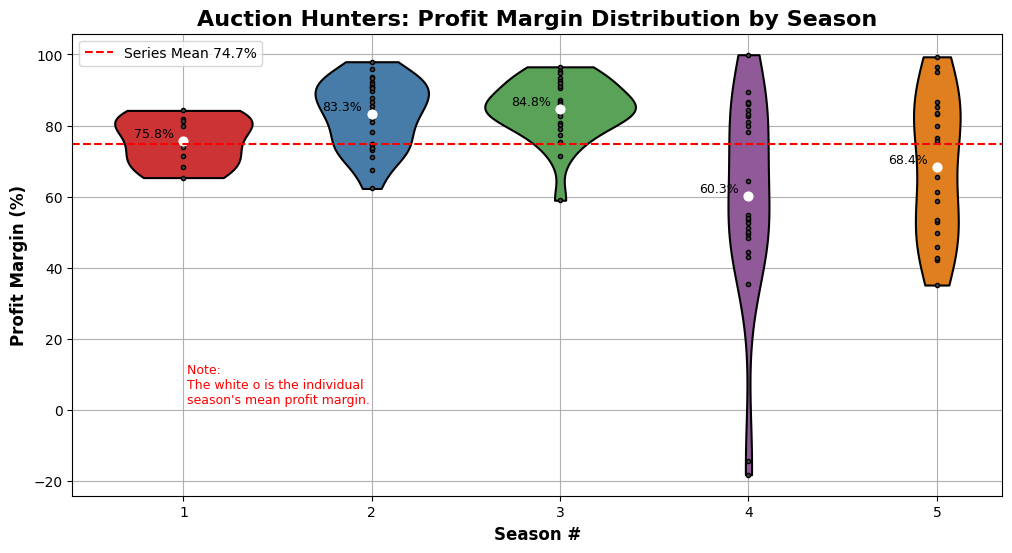

In [40]:
show_violin_plot_profit_margin(dataframe=df_pm_roi, average_profit_margin_float=average_profit_margin)

#### **⚖️ Remarks**
* 🕵️ The profit margin doesn't vary much in the first 3 seasons, however the spread is very significant in season 4 then season 5.
    * As we expect becasue season 4 had the lowest 2 profit and profit margin episodes in the negatives.
* 🕵️ Season 2 and 3 had the best profit margins, however they didn't have the largest outright sold and profit values.
* 🕵️ It would appear that season 1, 2 and 3 were more consistent in terms of profit margin.

## 1.4. What is the Return on Investment (ROI) for the entire series?

* **🏹 To tackle this question:**
   * 🥇 Generate the roi_% measure and add it to the dataframe.
   * 🥈 Visualise the data.
   * 🥉 Remove outliers and compare the affect of outliers on mean and standard deviation.

In [41]:
df_pm_roi['roi_%'] = round((df['profit_$'] / df['paid_$']) * 100, 2)

### 1.4.1. Visualise the Data

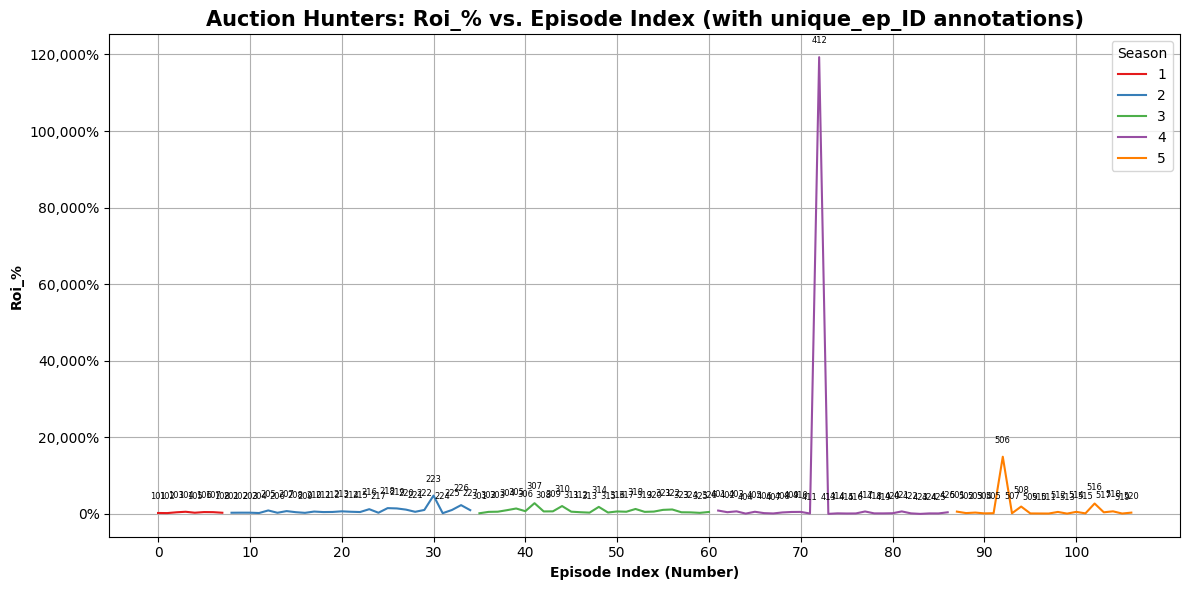

In [42]:
show_basic_feature_plot(dataframe=df_pm_roi, feature_col='roi_%', unit="%")

#### **⚖️ Remarks**
* 🕵️ We can't see anything for most episodes because ep 412 has an enormous ROI over 100,000% ⚠️
* 🕵️ However, we understand this is because in this episode a single storage unit was purchased for 5 dollars, which appeared like a junk unit but actually had valuable items.

### 1.4.2. What are the 3 highest ROI episodes in the series?

In [43]:
df_3best_roi = df_pm_roi.sort_values(by='roi_%', ascending=False).head(3).reset_index(drop=True)
df_3best_roi

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%,roi_%
0,4,12,412,Don't Taze Me Bro,"Stanton, California",2013-04-13,5,5970,5965,99.92,119300.00
1,5,6,506,Risk & Reward,"Mission Hills, California",2014-11-22,410,61550,61140,99.33,14912.20
2,2,23,223,Hot Wheels,"Palm Springs, California",2011-11-01,440,21420,20980,97.95,4768.18


### 1.4.3. What are the 3 lowest ROI episodes in the series?

In [44]:
df_3worst_roi = df_pm_roi.sort_values(by='roi_%', ascending=True).head(3).reset_index(drop=True)
df_3worst_roi

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%,roi_%
0,4,23,423,"Cashville, Tennessee","Nashville, Tennessee",2014-03-29,12800,13375,-2425,-18.13,-18.95
1,4,13,413,The Fall Guys,"Reseda, Los Angeles, California",2013-04-13,4000,3500,-500,-14.29,-12.50
2,5,13,513,Wreck-Shaw,"Santa Clarita, California",2015-04-18,3500,5400,1900,35.19,54.29


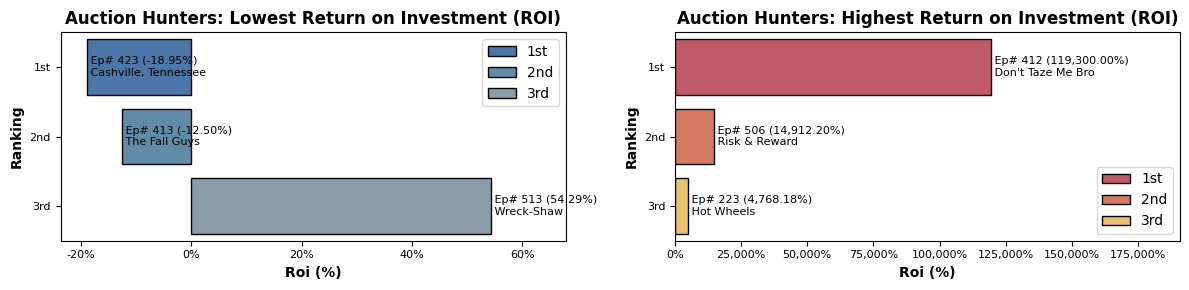

In [45]:
plot_best_worst_three_eps(df_3worst_roi, df_3best_roi, "roi", "Lowest Return on Investment (ROI)", "Highest Return on Investment (ROI)", "upper right", "lower right")

#### **⚖️ Remarks**
* 🕵️ The minimum ROI chart features the same episodes at the minimum profit margin chart. 
* 🕵️ The maximum ROI chart features the same episodes at the maximum profit margin chart. 
* 🕵️ The gap between the 1st to 2nd place, and 2nd to 3rd place maximum ROIs, is quite significant.

### 1.4.4. What is the average ROI and Standard Deviation over the entire series?

In [46]:
average_roi_series = round(df_pm_roi.loc[:,'roi_%'].mean(), 1)
std_dev_roi_series = round(df_pm_roi.loc[:,'roi_%'].std(), 1)
print(f"📈 The Average ROI for the Auction Hunters Series is: {average_roi_series}%.")
print(f"📈 The Average ROI Standard Deviation for the Auction Hunters Series is: {std_dev_roi_series}%.")

📈 The Average ROI for the Auction Hunters Series is: 1837.8%.
📈 The Average ROI Standard Deviation for the Auction Hunters Series is: 11565.4%.


#### **⚖️ Remarks**
* 🕵️ The series average ROI is just over 1800%, with a standard deviation of 11565%?? Well, if that doesn't indicate outliers then I don't know what does.
* 🕵️ The series ROI graph shows visually that very few episodes are actually above 1800% ROI and that a standard deviation of 11565% critically overestimates the data.
* 🕵️ If we exclude outliers, a more generalising average ROI will be revealed. Let's see what a more reasonable value might look like.

### 1.4.5. ROI Distribution with Outliers (i.e. all episodes) (Histogram)

In [47]:
def plot_histogram(df, title_append):
    """
    Draws a histogram for the entered dataframe and specified column.
    You can append the title if you adjust the dataframe.
    e.g. title_append = "with outliers > 2000% removed"
    """
    data = df['roi_%']

    # Create a figure
    fig, ax = plt.subplots(figsize=(10, 5))

    # Calculate histogram manually
    bins = np.linspace(min(data), max(data), 20)  # Specify bin edges
    frequencies, bin_edges = np.histogram(data, bins=bins, density=False)

    # Calculate bin centers
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Plot the bar graph
    ax.bar(bin_centers, frequencies, width=np.diff(bin_edges), color='#FA8072', edgecolor='black')
    
    # Annotate the frequency values on top of the bars (only if frequency > 0)
    for x, y in zip(bin_centers, frequencies):
        if y > 0:
            ax.text(x, y, f'{y}', ha='center', va='bottom', fontsize=9, color='black')

    ax.set_xlabel("ROI %", weight='bold')
    ax.set_ylabel('Episodes (Frequency)', weight='bold')
    ax.set_title(f"Auction Hunters: Histogram of ROI% Distribution of Episodes {title_append}", weight='bold', fontsize=15)

    # Format label ticks
    ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

    # Add a grid
    ax.set_axisbelow(True)
    ax.grid()

    plt.tight_layout()  # Ensure proper spacing
    plt.show()

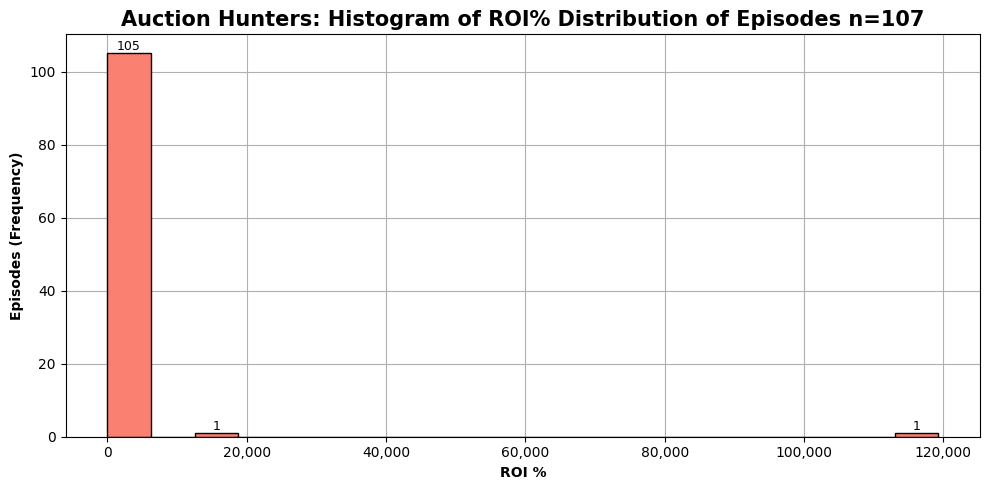

In [48]:
plot_histogram(df=df_pm_roi, title_append=f"n={len(df_pm_roi)}")

#### **⚖️ Remarks**
* 🕵️ We see the outliers very clearly in this histogram -> 105/107 values are in the first bucket!

### 1.4.6. ROI Distribution ❌ No Outliers!

* 🎯 Let's set a limit of 2000% to filter out the outlier ROI episodes. 
   * 👉 The mean and standard deviation for ROI should reduce significantly after filtering roi_% > 2000.
   * 👉 Let's first display the episodes that will be "filtered".

#### 1.4.6.1. Extracting and Ranking the Top (outlier) ROI Episodes

In [49]:
roi_ceiling = 2000
df_roi_outliers = df_pm_roi[df_pm_roi['roi_%'] > roi_ceiling].sort_values('roi_%', ascending=False).reset_index(drop=True)
df_roi_outliers

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%,roi_%
0,4,12,412,Don't Taze Me Bro,"Stanton, California",2013-04-13,5,5970,5965,99.92,119300.00
1,5,6,506,Risk & Reward,"Mission Hills, California",2014-11-22,410,61550,61140,99.33,14912.20
2,2,23,223,Hot Wheels,"Palm Springs, California",2011-11-01,440,21420,20980,97.95,4768.18
3,3,7,307,High Flying Ton,"Ventura, California",2012-04-18,450,12940,12490,96.52,2775.56
4,5,16,516,Pucks for Bucks,"Torrance, California",2015-04-25,420,11720,11300,96.42,2690.48
5,2,26,226,Reel Money,"San Diego, California",2011-11-22,800,18940,18140,95.78,2267.50
6,3,10,310,Fake Punt Payoff,"Pasadena, California",2012-05-09,600,12760,12160,95.30,2026.67


In [50]:
print(f"There are {len(df_roi_outliers)} Outliers in our dataset with an ROI greater than {roi_ceiling}%.")
num_non_outliers = len(df)-len(df_roi_outliers)
print(f"This means there are {num_non_outliers} episodes in the No Outliers Dataframe")

There are 7 Outliers in our dataset with an ROI greater than 2000%.
This means there are 100 episodes in the No Outliers Dataframe


#### 1.4.6.2. Let's visualise the series excluding ROI values over 2000%

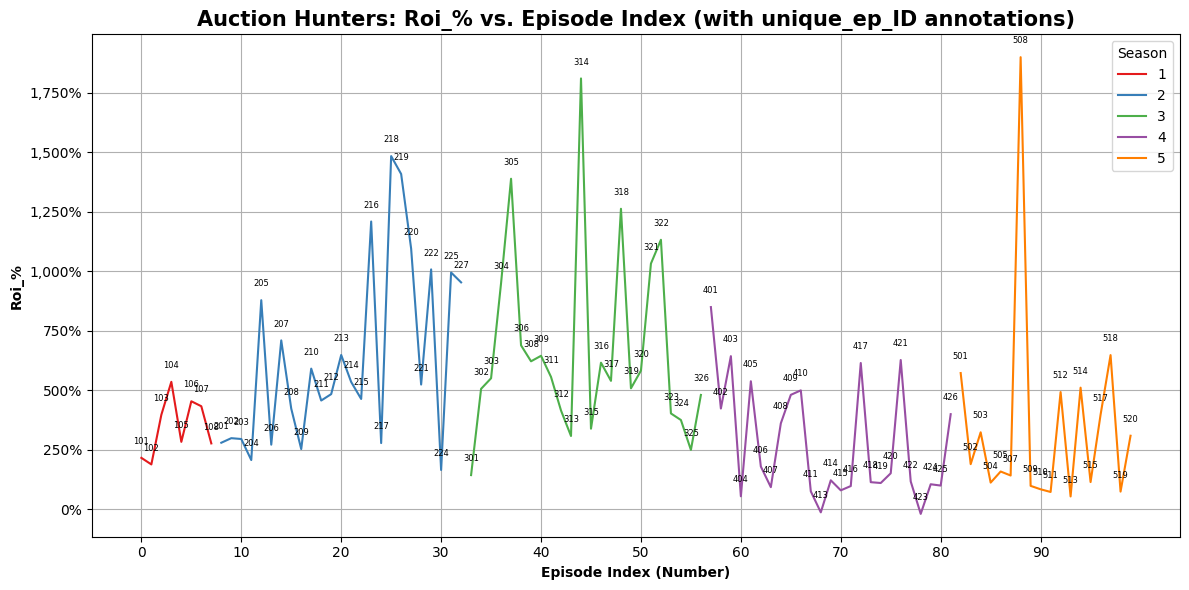

In [51]:
df_ROI_no_outliers = df_pm_roi[df_pm_roi['roi_%'] <= roi_ceiling].reset_index()
show_basic_feature_plot(dataframe=df_ROI_no_outliers, feature_col='roi_%', unit="%")

#### **⚖️ Remarks**
* 🕵️ It is much easier to see the trend of ROI% for the majority of episodes with the outliers removed.

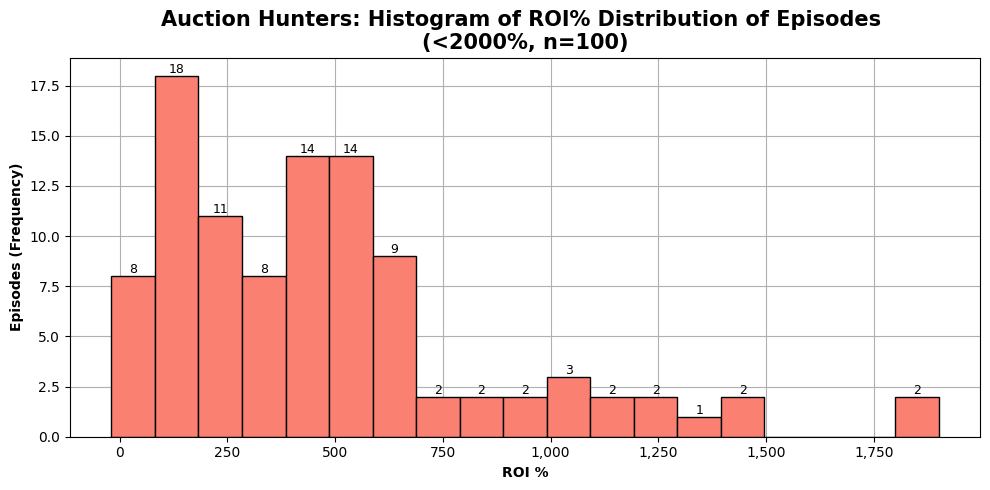

In [59]:
plot_histogram(df=df_pm_roi[df_pm_roi['roi_%'] < 2000], title_append=f"\n(<2000%, n={num_non_outliers})")

#### **⚖️ Remarks**
* 🕵️ Even after removing outliers, we still have right (positive) skewed data.
* 🕵️ However, there is a much more visible and distinguishable distrubution of ROI% values.

#### 1.4.6.3. Mean ROI and Standard Deviation (No Outliers) Compared over Series

In [53]:
average_roi_series_no_outliers = round(df_ROI_no_outliers.loc[:,'roi_%'].mean(), 1)
std_dev_roi_series_no_outliers = round(df_ROI_no_outliers.loc[:,'roi_%'].std(), 1)
print(f"📈 The Average ROI for the Auction Hunters (No Outliers) Series is: {average_roi_series_no_outliers}%.")
print(f"📈 The Average ROI Standard Deviation for the Auction Hunters (No Outliers) Series is: {std_dev_roi_series_no_outliers}%.")

📈 The Average ROI for the Auction Hunters (No Outliers) Series is: 479.0%.
📈 The Average ROI Standard Deviation for the Auction Hunters (No Outliers) Series is: 389.8%.


#### 1.4.6.4. Mean ROI and Standard Deviation Table with and without outliers

In [54]:
data = [[average_roi_series, average_roi_series_no_outliers], [std_dev_roi_series, std_dev_roi_series_no_outliers]]
cols = ['all_episodes_roi_%', 'no_outliers_roi_%']
index = ['Mean', 'St. Dev']
roi_average_std_series_with_without_outliers_df = pd.DataFrame(data=data, columns=cols, index=index)
roi_average_std_series_with_without_outliers_df

,all_episodes_roi_%,no_outliers_roi_%
Mean,1837.8,479.0
St. Dev,11565.4,389.8


#### 1.4.6.5. Visualising the affect of outliers on Mean and Standard Deviation

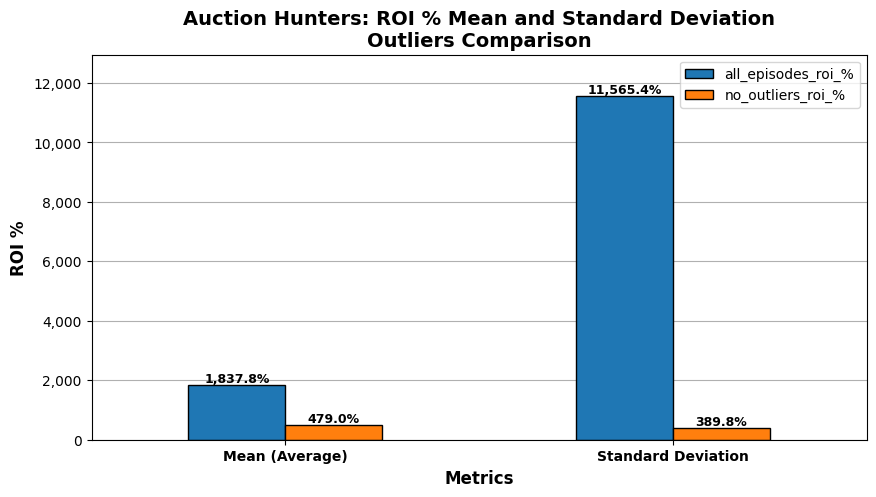

In [55]:
ax = roi_average_std_series_with_without_outliers_df.plot(
    kind="bar", 
    ylabel="ROI %", 
    figsize=(10,5), 
    edgecolor='black')

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', weight="bold", fontsize=9, color='black')

# Extend the y axis a little bit and format the numbers to have commas.
ax.set_ylim(0, 1.12 * roi_average_std_series_with_without_outliers_df.max().max())
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
custom_xticklabels = ['Mean (Average)', 'Standard Deviation']
ax.set_xticklabels(custom_xticklabels, fontsize=10, fontweight="bold", rotation=0)
ax.set_axisbelow(True)

# Make the title and axis texts bold
ax.set_title("Auction Hunters: ROI % Mean and Standard Deviation\nOutliers Comparison", fontsize=14, fontweight="bold")
ax.set_xlabel("Metrics", fontsize=12, fontweight="bold")
ax.set_ylabel("ROI %", fontsize=12, fontweight="bold")
ax.grid(axis='y')

plt.show()

#### **⚖️ Remarks**
* 🕵️ This bar plot visualises how significant the impact of the 7 outlier (>2000% ROI) episodes are on the entire dataset. 
* 🕵️ After filtering out the outliers, we were able to reduce the mean and standard deviation of ROI % by multiple factors to a more realistic size.

### 1.4.7. What is the average ROI per season with and without outliers?

In [56]:
average_roi_by_season_df = df_pm_roi.groupby('season_num')['roi_%'].mean().reset_index()
average_roi_by_season_df['roi_%'] = average_roi_by_season_df['roi_%'].round(2)

average_roi_by_season_no_outliers_df = df_ROI_no_outliers.groupby('season_num')['roi_%'].mean().reset_index()
average_roi_by_season_no_outliers_df['roi_%'] = average_roi_by_season_no_outliers_df['roi_%'].round(2)

average_roi_by_season_df.rename(columns={'roi_%': 'all_episodes_roi_%'}, inplace=True)
average_roi_by_season_no_outliers_df.rename(columns={'roi_%': 'no_outliers_roi_%'}, inplace=True)

average_roi_by_season_outliers_merged_df = average_roi_by_season_df.merge(average_roi_by_season_no_outliers_df, on='season_num', how='left')

average_roi_by_season_outliers_merged_df['difference'] = average_roi_by_season_outliers_merged_df['all_episodes_roi_%'] - average_roi_by_season_outliers_merged_df['no_outliers_roi_%']
average_roi_by_season_outliers_merged_df['ratio'] = round(average_roi_by_season_outliers_merged_df['all_episodes_roi_%'] / average_roi_by_season_outliers_merged_df['no_outliers_roi_%'], 1)

average_roi_by_season_outliers_merged_df

,season_num,all_episodes_roi_%,no_outliers_roi_%,difference,ratio
0,1,348.38,348.38,0.00,1.0
1,2,850.39,637.00,213.39,1.3
2,3,804.44,671.38,133.06,1.2
3,4,4850.53,272.55,4577.98,17.8
4,5,1193.13,347.77,845.36,3.4


#### 1.4.6.1. Visualise the ROI% per season with and without outlier episodes

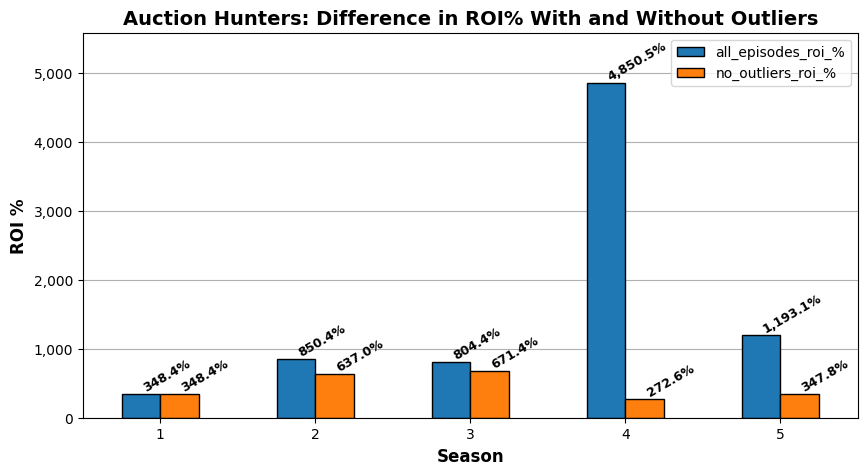

In [60]:
ax = average_roi_by_season_outliers_merged_df.plot(
    x='season_num', 
    y=['all_episodes_roi_%', 'no_outliers_roi_%'], 
    kind="bar", 
    figsize=(10, 5),
    edgecolor='black')

# labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='left', va='bottom', weight="bold", fontsize=9, color='black', rotation=30)

# Extend the y axis a little bit and format the numbers to have commas.
ax.set_ylim(0, 1.15 * average_roi_by_season_outliers_merged_df['all_episodes_roi_%'].max())
ax.set_xlim(-0.5, 4.5)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_axisbelow(True)

# Make the title and axis texts bold
ax.set_title("Auction Hunters: Difference in ROI% With and Without Outliers", fontsize=14, fontweight="bold")
ax.set_xlabel("Season", fontsize=12, fontweight="bold")
ax.set_ylabel("ROI %", fontsize=12, fontweight="bold")
ax.grid(axis='y')

plt.show()

#### **⚖️ Remarks**
* 🕵️ Looking closely at seasons 4 and 5 👀
   * We removed 1 episode (412) and the average season 4 ROI% goes from 4850% down to 272%.
   * We removed 2 episodes (506 and 516) and the average season 5 ROI% goes from 1193% down to 347%.
* 🕵️ Season 1 had no affect from outliers, but seasons 2 and 3 had a small but noticeable affect where ROI% went down as outliers were removed.

## 1.5. What is the relative Paid, Sold, Profit for number of episodes per season?

**Reminder:** 
* 📊 Relative measures are used to account for (normalise for) the number of episodes in a season.
* 📊 It allows us to more accurately compare metrics.

* **🏹 To tackle this question:**
   * 🥇 Derive the season total financial metrics and define the relative metrics in the dataframes.
   * 🥈 Visualise the raw and culmulative data.

### 1.5.1. Generate then Visualise the Total Financial Metrics

In [61]:
df_seasons_total = df.groupby('season_num')[['paid_$', 'sold_$', 'profit_$']].sum()
df_seasons_total.rename(columns={'paid_$': 'total_paid_$',
                                'sold_$': 'total_sold_$',
                                'profit_$': 'total_profit_$'}, inplace=True)
df_seasons_total

,total_paid_$,total_sold_$,total_profit_$
season_num,,,
1,9421,39925,30404
2,40410,285450,244380
3,40287,270309,230022
4,78783,222045,140262
5,91556,362870,271314


In [64]:
def plot_total_lines_by_season(df, list_of_input_metrics=['total_paid_$','total_sold_$','total_profit_$'], fill_color=False):
    """
    Plot shaded total value lines for specified metrics by season.
    The input dataframe should contain columns for each season (Season 1, Season 2, etc.)
    and the metrics to be plotted (e.g., total_paid_$, total_sold_$, total_profit_$).
    If fill_color=True, then the plot will be shaded the same color as the line of the metric.
    """
    
    # Check if the 3 input columns are in the dataframe that is passed into this function.
    if len(list_of_input_metrics) > 3:
        raise ValueError("There are currently only 3 colors specified for the plot, so anything more than 3 will require changes to the code (i.e. longer color list).")
    
    missing_columns = [col for col in list_of_input_metrics if col not in df.columns]
    if missing_columns:
        raise ValueError(f"The following columns are missing in the dataframe: {', '.join(missing_columns)}")
    
    # Create a figure
    plt.figure(figsize=(12, 6))
    
    # Prevent the function from modifying the external dataframe
    df2 = df.copy()
    
    # Define colors for lines
    colors = ['b', 'g', 'r']
    
    # Plot total lines for each metric
    for i, metric in enumerate(list_of_input_metrics):
        ax = sns.lineplot(data=df2, x=df2.index, y=metric, color=colors[i], label=metric, marker="o")
        if fill_color == True:
            ax.fill_between(df2.index, 0, df2[metric], alpha=0.3, color=colors[i])
        
        # Annotate values at each season with $ values
        for j, value in enumerate(df2[metric]):
            plt.text(df2.index[j], value, f'${int(value):,}', ha='right', va='center', fontsize=10)
        
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    ax.set_axisbelow(True)
    plt.title('Auction Hunters: Financial Metrics by Season', weight="bold", fontsize=14)
    plt.xlabel('Season #', fontsize=12, weight="bold")
    plt.ylabel('Total Metric Value ($)', fontsize=12, weight="bold")
    plt.xticks(fontsize=10)
    plt.grid(True)
    plt.yticks(fontsize=10)
    plt.xticks(range(1, 6), fontsize=10)
    plt.xlim(0.65, 5.35) # make space on the left and right edges for annotations
    plt.legend()
    
    plt.show()

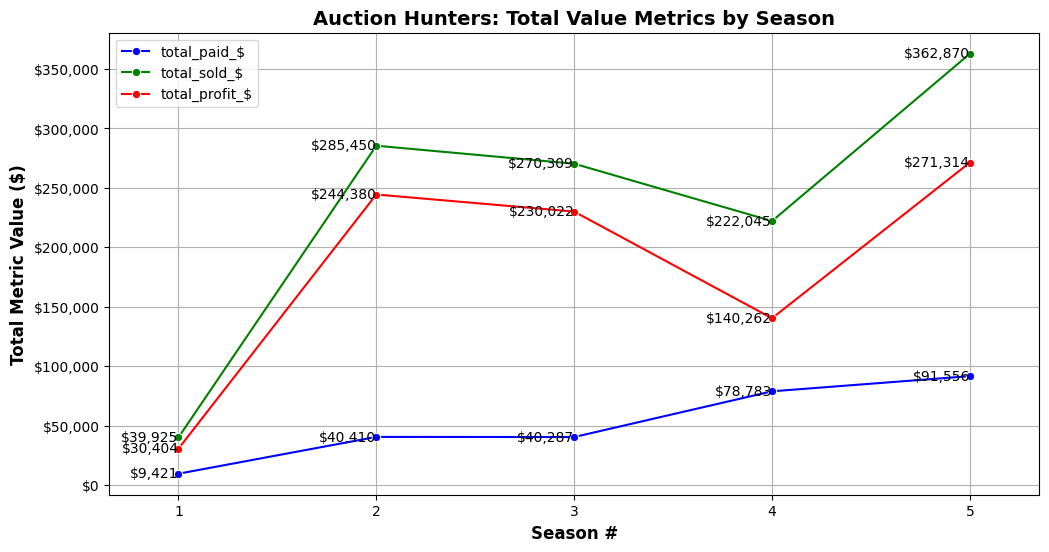

In [63]:
plot_total_lines_by_season(df_seasons_total)

#### **⚖️ Remarks**
* 🕵️ We observe for each season how the total paid, sold and profit changes. 
* 🕵️ Season 1 to Season 2 is the largest change in metrics, followed by the season 4 to 5 change.
* 🕵️ The season 2 to season 3 reduction in metrics is relatively minor, compared to the sudden drop between season 3 and season 4.

### 1.5.2. Second, let's generate the season episode counts table:

In [65]:
season_episode_counts = df['season_num'].value_counts().sort_index()
season_episode_counts_df = season_episode_counts.reset_index()
season_episode_counts_df.columns = ['season_num', 'episode_count']
season_episode_counts_df

,season_num,episode_count
0,1,8
1,2,27
2,3,26
3,4,26
4,5,20


### 1.5.3. Generate the Relative Values Dataframe (**average per episode by season**)

In [66]:
df_relative_seasons = df_seasons_total.merge(season_episode_counts_df, on='season_num', how='left')
df_relative_seasons['relative_paid_$'] = round(df_relative_seasons['total_paid_$'] / df_relative_seasons['episode_count'], 2)
df_relative_seasons['relative_sold_$'] = round(df_relative_seasons['total_sold_$'] / df_relative_seasons['episode_count'], 2)
df_relative_seasons['relative_profit_$'] = round(df_relative_seasons['total_profit_$'] / df_relative_seasons['episode_count'], 2)
df_relative_seasons

,season_num,total_paid_$,total_sold_$,total_profit_$,episode_count,relative_paid_$,relative_sold_$,relative_profit_$
0,1,9421,39925,30404,8,1177.62,4990.62,3800.50
1,2,40410,285450,244380,27,1496.67,10572.22,9051.11
2,3,40287,270309,230022,26,1549.50,10396.50,8847.00
3,4,78783,222045,140262,26,3030.12,8540.19,5394.69
4,5,91556,362870,271314,20,4577.80,18143.50,13565.70


### 1.5.3.1. In which season was the most money **paid** for a unit on an episode on average?

In [67]:
df_relative_seasons.sort_values('relative_paid_$', ascending=False).reset_index(drop=True)

,season_num,total_paid_$,total_sold_$,total_profit_$,episode_count,relative_paid_$,relative_sold_$,relative_profit_$
0,5,91556,362870,271314,20,4577.80,18143.50,13565.70
1,4,78783,222045,140262,26,3030.12,8540.19,5394.69
2,3,40287,270309,230022,26,1549.50,10396.50,8847.00
3,2,40410,285450,244380,27,1496.67,10572.22,9051.11
4,1,9421,39925,30404,8,1177.62,4990.62,3800.50


### 1.5.3.2. In which season was the most money **made from selling** a unit's contents per episode on average?

In [68]:
df_relative_seasons.sort_values('relative_sold_$', ascending=False).reset_index(drop=True)

,season_num,total_paid_$,total_sold_$,total_profit_$,episode_count,relative_paid_$,relative_sold_$,relative_profit_$
0,5,91556,362870,271314,20,4577.80,18143.50,13565.70
1,2,40410,285450,244380,27,1496.67,10572.22,9051.11
2,3,40287,270309,230022,26,1549.50,10396.50,8847.00
3,4,78783,222045,140262,26,3030.12,8540.19,5394.69
4,1,9421,39925,30404,8,1177.62,4990.62,3800.50


### 1.5.3.3. In which season was the most money **profited** from selling a unit's contents on an episode on average?

In [69]:
df_relative_seasons.sort_values('relative_profit_$', ascending=False).reset_index(drop=True)

,season_num,total_paid_$,total_sold_$,total_profit_$,episode_count,relative_paid_$,relative_sold_$,relative_profit_$
0,5,91556,362870,271314,20,4577.80,18143.50,13565.70
1,2,40410,285450,244380,27,1496.67,10572.22,9051.11
2,3,40287,270309,230022,26,1549.50,10396.50,8847.00
3,4,78783,222045,140262,26,3030.12,8540.19,5394.69
4,1,9421,39925,30404,8,1177.62,4990.62,3800.50


#### **⚖️ Remarks**
* 🕵️ Season 5 takes the top position for all of the highest relative metrics.
    * Highest relative paid units, sold units and profits. It is the strongest financial perorming season.
* 🕵️ Interestingly, season 1 still ranks last in relative performance even though it had 8 episodes.
    * Season 1 has the lowest financial performance.

### 1.5.4. What is the average paid, sold and profit for the entire series (i.e. the average per episode)?

In [70]:
series_avg_paid = df.loc[:, "paid_$"].mean()
series_avg_sold = df.loc[:, "sold_$"].mean()
series_avg_profit = df.loc[:, "profit_$"].mean()
series_avg_data = {'series_average_paid_$': round(series_avg_paid, 2), 
                   'series_average_sold_$': round(series_avg_sold, 2),
                   'series_average_profit_$': round(series_avg_profit, 2)}

df_relative_series = pd.DataFrame.from_records([series_avg_data])
df_relative_series 

,series_average_paid_$,series_average_sold_$,series_average_profit_$
0,2434.18,11033.64,8564.32


### 1.5.5. Visualise Season Average vs. Series Average

In [75]:
def plot_relative_data_vs_series_averages(season_data):
    """
    This function will plot a  dataframe containing columns:
    'season_num', 'total_paid_$', 'total_sold_$', 'total_profit_$', 'episode_count', 'relative_paid_$', 'relative_sold_$', 'relative_profit_$'
    as a bar plot comparing the relative values with the series average values. Average values will be calcluated from the total values in the function.
    """
    
    df3 = season_data.copy()

    required_input_metrics = ['season_num', 'total_paid_$', 'total_sold_$', 'total_profit_$', 'episode_count', 'relative_paid_$', 'relative_sold_$', 'relative_profit_$']
    missing_columns = [col for col in required_input_metrics if col not in df3.columns]
    if missing_columns:
        raise ValueError(f"The following columns are missing in the dataframe: {', '.join(missing_columns)}")

    series_avg_paid = round(df3['total_paid_$'].sum() / df3['episode_count'].sum(), 2)
    series_avg_sold = round(df3['total_sold_$'].sum() / df3['episode_count'].sum(), 2)
    series_avg_profit = round(df3['total_profit_$'].sum() / df3['episode_count'].sum(), 2)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Set the width of the bars
    bar_width = 0.2

    # Set the positions of the bars on the x-axis
    season_positions = np.arange(len(df3['season_num']))

    # Define colors for the bars
    bar_colors = ['#377eb8', '#4daf4a', '#e41a1c']

    # Create the bar plot
    for i, (values, label) in enumerate(zip(['relative_paid_$', 'relative_sold_$', 'relative_profit_$'], ['Season Rel. Paid', 'Season Rel. Sold', 'Season Rel. Profit'])):
        ax.bar(season_positions + i * bar_width, df3[values], bar_width, label=label, color=bar_colors[i], edgecolor='black')

        # Annotate the bar plots
        for x, y in zip(season_positions + i * bar_width, df3[values]):
            ax.text(x, y, f'${y:,.0f}', ha='center', va='bottom', fontsize=8, color='black', rotation=30, weight="bold")

        ax.axhline(y=eval(f'series_avg_{values.split("_")[1]}'), color=bar_colors[i], linestyle='--', label=f'Series Avg. {label.split(" ")[-1]}')

        # Annotate the horizontal lines to the left
        ax.annotate(f'${series_avg_paid:.0f}', xy=(-0.45, series_avg_paid+250), fontsize=9, color='black')
        ax.annotate(f'${series_avg_sold:.0f}', xy=(-0.45, series_avg_sold+250), fontsize=9, color='black')
        ax.annotate(f'${series_avg_profit:.0f}', xy=(-0.45, series_avg_profit+250), fontsize=9, color='black')

    # Customize the plot (labels, title, legend, etc.)
    ax.set_xticks(season_positions + bar_width)
    ax.set_xticklabels(df3['season_num'])
    ax.set_xlabel('Season #', weight="bold")
    ax.set_ylabel('Dollar Amount ($)', weight="bold")
    ax.set_title('Auction Hunters: Metrics - Season Relative vs. Series Average', weight="bold")
    ax.set_ylim(0, 1.15 * df3[['relative_paid_$', 'relative_sold_$', 'relative_profit_$']].max().max())
    ax.set_xlim(-0.5, 5)
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    ax.set_axisbelow(True)
    ax.grid(True)
    ax.legend()
    plt.show()

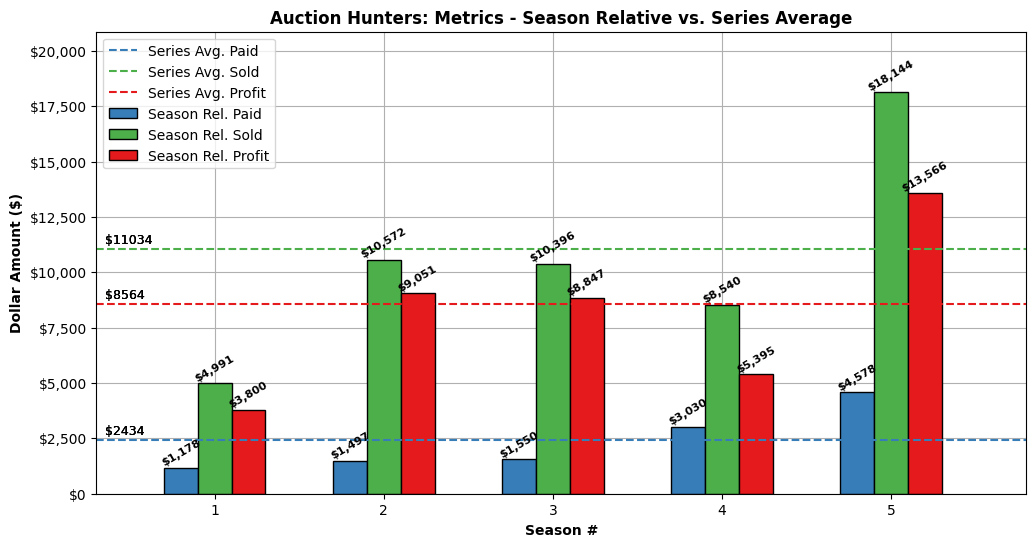

In [76]:
plot_relative_data_vs_series_averages(df_relative_seasons)

#### **⚖️ Remarks**
* 🕵️ In this graph, we can see each season's relative performance compared to the series average.
* 🕵️ We can see that:
    * Season 5 is the only season that exceeded the series average in relative sold and profit.
    * Season 1 had the lowest financial metrics and is relatively insignificant compared to the remainder of the series.
    * Seasons 2 and 3 are almost identical in relative performance and barely performed above average in only profit, but had lower unit paid price.
    * Season 4 is strange - higher relative unit paid price and below series average sold and profit metrics. Not a very strong season it seems.
* 🕵️ Overall, we have an almost perfect plateau region for seasons 2, 3 and 4 whilst season 1 was of lower financial significance and season 5 was of higher financial significance.

### 1.5.6. Cumulative Plot By Season

In [77]:
def plot_cumulative_shaded_line_by_season(df):
    """
    Insert a dataframe with total paid, sold profit by season dataframe with the list of metrics you want to plot.
    ** Do not change the order of metrics from paid, sold, profit in the list.
    """
    # Create a figure
    plt.figure(figsize=(12, 6))
    
    # Prevent the function from modifying the external dataframe
    df2 = df.copy()
    
    # Hard-coding the required metrics.
    list_of_input_metrics = ['total_paid_$','total_sold_$','total_profit_$']
    
    # Define colors and output metrics
    colors = ['b', 'g', 'r']
    output_metrics = ['cum_total_paid_$', 'cum_total_sold_$', 'cum_total_profit_$']
    
    # Calculate cumulative metrics and add them to the dataframe df.
    for i, metric in enumerate(list_of_input_metrics):
        df2[output_metrics[i]] = df2[metric].cumsum()
    
    # Plot cumulative metric
    for i, metric in enumerate(output_metrics):
        ax = sns.lineplot(data=df2, x='season_num', y=metric, color=colors[i], label=(metric.replace('cum_','')).capitalize(), marker="o")
        ax.fill_between(df2['season_num'], 0, df2[metric], alpha=0.3, color=colors[i])
        
        # Annotate cumsum() values at each season with $ values
        for j, value in enumerate(df2[metric]):
            if j == 0:  # Check if it's season 1
                if metric == output_metrics[0]: # paid
                    plt.text(df2['season_num'][j], value, f'${int(value):,}', ha='right', va='top', fontsize=10)
                elif metric == output_metrics[1]: # sold
                    plt.text(df2['season_num'][j], value, f'${int(value):,}', ha='right', va='bottom', fontsize=10)
                else:  # cumulative_profit
                    plt.text(df2['season_num'][j], value, f'${int(value):,}', ha='right', va='center', fontsize=10)
            else:  # For other seasons, keep the default alignment
                plt.text(df2['season_num'][j], value, f'${int(value):,}', ha='right', va='bottom', fontsize=10)            
     
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    ax.set_axisbelow(True)
    # ax.spines[['left', 'right', 'top']].set_visible(False)     # Remove the top and right axis
    plt.title('Auction Hunters: Cumulative Metrics by Season', weight="bold", fontsize=14)
    plt.xlabel('Season', fontsize=12, weight="bold")
    plt.ylabel('Cumulative Value ($)', fontsize=12, weight="bold")
    plt.xlim(0.65, 5.35) # make space on the left and right edges for annotations
    plt.xticks(range(1, 6), fontsize=10)
    plt.grid(True)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.show()

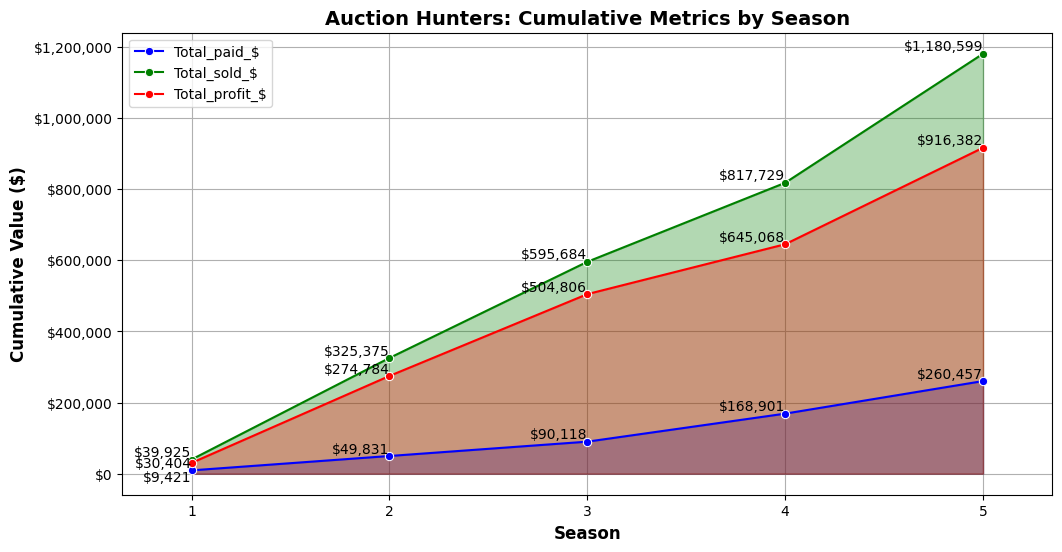

In [78]:
plot_cumulative_shaded_line_by_season(df_relative_seasons)

#### **⚖️ Remarks**
* 🕵️ We observe an almost linear cumulative increase with each season except for the dop in season 4.
* 🕵️ The paid price experiences a slight increase after season 3, as the unit purchase prices increase.
    * This is evident from the financial trends in section 1.2.

### 1.5.7. Cumulative Plot By Episodes

In [79]:
def plot_cumulative_shaded_line_by_episode(df):
    """
    Insert a dataframe with columns: total paid, sold profit by episode.
    This function will plot cumulative metrics for each episode without annotations.
    """
    # Create a figure
    plt.figure(figsize=(12, 6))

    # Prevent the function from modifying the external dataframe
    df2 = df.copy()

    # Define the list of input metrics
    list_of_input_metrics = ['paid_$', 'sold_$', 'profit_$']

    # Define colors and output metrics
    colors = ['b', 'g', 'r']
    output_metrics = ['cum_total_paid_$', 'cum_total_sold_$', 'cum_total_profit_$']

    # Calculate cumulative metrics and add them to the dataframe df.
    for i, metric in enumerate(list_of_input_metrics):
        df2[output_metrics[i]] = df2[metric].cumsum()

    # Plot cumulative metric by episode index
    for i, metric in enumerate(output_metrics):
        ax = sns.lineplot(data=df2, x=df2.index, y=metric, color=colors[i], label=(metric.replace('cum_', '')).capitalize())
        ax.fill_between(df2.index, 0, df2[metric], alpha=0.3, color=colors[i])

    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    ax.set_axisbelow(True)
    plt.title('Auction Hunters: Cumulative Metrics by Episode', weight="bold", fontsize=14)
    plt.xlabel('Episode by Index', fontsize=12, weight="bold")
    plt.ylabel('Cumulative Value ($)', fontsize=12, weight="bold")
    plt.xticks(fontsize=10)
    ax.text(36, 1025000, "Note:\nThe bold numbers above the\nx-axis mark the beginning\nof each season.", size=9, color='red') # 0 is the index, so it means season 1.
    plt.grid(which='both', axis='y')
    plt.legend(loc='upper left')
    
    # Annotate the season starts based on unique_ep_ID
    for unique_ep_ID in [101, 201, 301, 401, 501]:
        episode_index = df2.index[df2['unique_ep_ID'] == unique_ep_ID]
        if not episode_index.empty:
            plt.annotate(f'{unique_ep_ID}', (episode_index[0], 0), textcoords="offset points", xytext=(0, -10), ha='center', fontsize=10, weight="bold")
            plt.axvline(x=episode_index[0], color='gray', linestyle='--', ymin=0.05)

    plt.show()


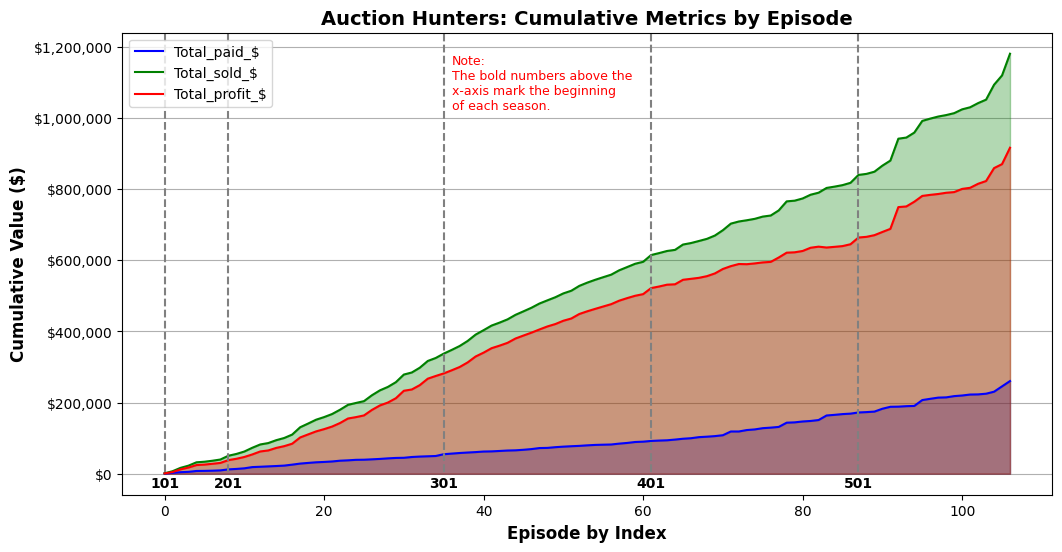

In [80]:
plot_cumulative_shaded_line_by_episode(df) 

#### **⚖️ Remarks**
* 🕵️ Here, we can see the relative length of seasons and the financial metrics changing cumulatively.
* 🕵️ Each metric changes quite linearly and only some small observations of sharp increases, such as early and late season 5.

## 1.6. Which season has the best financial metrics?

* **🏹 To tackle this question:**
   * 🥇 Data needs to be collected and organised into a table and columns need to be renamed for context.
   * 🥈 A sorting algorithm needs to be written to allocate scores to specific seasons for having the best metrics.
   * 🥉 Visualise the scoring data.

**⚠️ This section includes all data, i.e. the outliers are included!**
* **Rules:**
   * For each metric, the best performer will get 5 points, then the second best with 4 points, 3rd best 3 points and so on.
   * For fairness, this ranking point system will use the relative (average) metrics by season so that episode count is ruled out as an influence.
   * Columns to rank are:
      * **relative_paid**           (lower paid = higher score)
      * **relative_sold**           (higher sold = higher score)
      * **relative_profit**         (higher profit = higher score)
      * **relative_profit_margin**  (higher PM = higher score)
      * **relative_roi**            (higher ROI = higher score)
   * The total metric points will be totalled at the end and ranked most points (highest performing) to lowest points (lowest performing).

### 1.6.1. Load required tables

In [81]:
df1_relative_paid_sold_profit = df_relative_seasons.loc[:,['season_num', 'relative_paid_$', 'relative_sold_$', 'relative_profit_$']]
df1_relative_paid_sold_profit

,season_num,relative_paid_$,relative_sold_$,relative_profit_$
0,1,1177.62,4990.62,3800.50
1,2,1496.67,10572.22,9051.11
2,3,1549.50,10396.50,8847.00
3,4,3030.12,8540.19,5394.69
4,5,4577.80,18143.50,13565.70


In [82]:
df2_average_profit_margin_by_season = average_profit_margin_by_season.copy()
df2_average_profit_margin_by_season.rename(columns={'profit_margin_%': 'relative_profit_margin_%'}, inplace=True)
df2_average_profit_margin_by_season

,season_num,relative_profit_margin_%
0,1,75.8
1,2,83.3
2,3,84.8
3,4,60.3
4,5,68.4


In [83]:
df3_average_roi_by_season_outliers_merged_df = average_roi_by_season_outliers_merged_df.loc[:, ['season_num', 'all_episodes_roi_%']]
df3_average_roi_by_season_outliers_merged_df.rename(columns={'all_episodes_roi_%': 'relative_roi_%'}, inplace=True)
df3_average_roi_by_season_outliers_merged_df

,season_num,relative_roi_%
0,1,348.38
1,2,850.39
2,3,804.44
3,4,4850.53
4,5,1193.13


### 1.6.2. Merge the tables

In [84]:
relative_metrics_df1 = df1_relative_paid_sold_profit.merge(df2_average_profit_margin_by_season, on='season_num', how='left')
final_relative_metrics_df = relative_metrics_df1.merge(df3_average_roi_by_season_outliers_merged_df, on='season_num', how='left')

In [85]:
final_relative_metrics_df 

,season_num,relative_paid_$,relative_sold_$,relative_profit_$,relative_profit_margin_%,relative_roi_%
0,1,1177.62,4990.62,3800.50,75.8,348.38
1,2,1496.67,10572.22,9051.11,83.3,850.39
2,3,1549.50,10396.50,8847.00,84.8,804.44
3,4,3030.12,8540.19,5394.69,60.3,4850.53
4,5,4577.80,18143.50,13565.70,68.4,1193.13


### 1.6.3. Ranking Points and Merging to Ranking Table

In [86]:
def make_score_table(df_metrics):
    """
    You must insert the dataframe of relative metrics that looks like this:
    season_num,	relative_paid_$, relative_sold_$, relative_profit_$, relative_profit_margin_%, relative_roi_%.
    From there, the score will be determined by ranking each criteria from best to worst (5 points to 1 point respectively).
    Output is a dataframe of season ranked by final score.
    """
    df = df_metrics.copy()

    required_input_metrics = ['season_num', 'relative_paid_$', 'relative_sold_$', 'relative_profit_$', 'relative_profit_margin_%', 'relative_roi_%']
    missing_columns = [col for col in required_input_metrics if col not in df.columns]
    if missing_columns:
        raise ValueError(f"The following columns are missing in the dataframe: {', '.join(missing_columns)}")

    points_df_col_name = 'points'
    points_df = pd.DataFrame({points_df_col_name:[5,4,3,2,1]})
    
    columns_to_rank = ['relative_paid_$', 'relative_sold_$', 'relative_profit_$', 'relative_profit_margin_%', 'relative_roi_%']
    
    asc_dict = {
        'relative_paid_$': True,
        'relative_sold_$': False,
        'relative_profit_$': False,
        'relative_profit_margin_%': False,
        'relative_roi_%': False
    }
    
    new_point_col_names = {
        'relative_paid_$': 'paid_points',
        'relative_sold_$': 'sold_points',
        'relative_profit_$': 'profit_points',
        'relative_profit_margin_%': 'profit_margin_points',
        'relative_roi_%': 'roi_points'
    }
    
    dfs_list = []
    # loop through each column
    for col in columns_to_rank:
        # make a new df with only season_num and the column. Sort it by asc or desc by checking the dictionary.
        df1 = df.loc[:, ['season_num', col]].sort_values(col, ascending=asc_dict[col]).reset_index(drop=True)
        # join this new df with the points df. points are now lined up with the metric.
        df1_with_points = pd.concat([df1, points_df], axis=1)
        # rename the points column to include the metric description. e.g. 'points' -> paid_points
        df1_with_points.rename(columns={points_df_col_name: new_point_col_names[col]}, inplace=True)
        # sort this new df by season_num.
        df1_with_points = df1_with_points.sort_values('season_num', ascending=True).reset_index(drop=True)
        # append this df to a list of dfs.
        dfs_list.append(df1_with_points)     

    # start with a df in the list
    points_df = dfs_list[0]
    # loop through all dfs in the list
    for df in dfs_list[1:]:
        # merge each next df with the merge of previous ones.
        points_df = points_df.merge(df, on='season_num', how='left')
        
    # this list is the list of metric_points column names.
    sum_these_cols = list(new_point_col_names.values())
        
    # make a new column which is the integer sum of the above metric_column values.   
    points_df['total_score'] = points_df[sum_these_cols].sum(axis=1)
    
    # Sort the output df by total_score
    points_df = points_df.sort_values('total_score', ascending=False).reset_index(drop=True)

    # Select columns for the final result
    points_df_score_final = points_df[['season_num', 'total_score']]

    return points_df_score_final

In [87]:
metric_ranking_df = make_score_table(final_relative_metrics_df)
metric_ranking_df

,season_num,total_score
0,2,19
1,5,17
2,3,16
3,4,12
4,1,11


In [88]:
# Get Set1 Colors as hex
# sns.color_palette("Set1").as_hex()[0:5]

In [89]:
def bar_plot_by_season(df, color, height=5, width=10, ycol="some_value", ylabel="some_value2", title="Plot Title", xlabels_col="season_num", use_tp_max=False, gridax=True, yaxis_on=True):
    """
    Use this function to plot a dataframe.
    Use color=bar_colors to use custom autumn colors (looks great!)
    Change color="Set1_colors" to use the original colors.
    **ylabel is a simple metric with no units!**
    xlabels_col is what you want to see on the xaxis, as it appears in your column.
    use_tp_max sets the max y axis using the total_score max value, including ticks.
    """
    
    bar_colors = ['#D00127', '#DE6B04', '#EFC943', '#65774D', '#644A2A'] # fall colors
    Set1_colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00'] # ['red', 'blue', 'green', 'purple', 'orange'] original Set1 colors, manually coded.
    
    # colors = ['#157145', '#57A773', '#6A8EAE', '#9BD1E5', '#D1FAFF'] #greens
    if color == "bar_colors":
        color = bar_colors
    if color == "Set1_colors":
        color = Set1_colors
    
    ax = df.plot(
        kind="bar", 
        x=xlabels_col, 
        y=ycol,
        figsize=(width, height), 
        edgecolor='black',
        color=color,
        legend=False
    )

    # Annotate the top of the bars with each season's score
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12, color='black', weight="bold")

    # Extend the y axis a little bit and format the numbers to have commas.
    ax.set_ylim(0, 1.12 * (df['total_score'].max() if use_tp_max == True else df.max().max()))
    # ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    custom_xticklabels = df[xlabels_col]
    ax.set_xticklabels(labels=custom_xticklabels, fontsize=10, fontweight="bold", rotation=0)
    ax.set_axisbelow(True)
    ax.set_title(title, fontsize=16, fontweight="bold")
    ax.set_xlabel(xlabels_col.replace('_', " ").capitalize(), fontsize=12, fontweight="bold")
    ax.set_ylabel(ylabel, fontsize=12, fontweight="bold")
    if yaxis_on == True:
        plt.yticks(range(0, (df['total_score'].max() if use_tp_max == True else df.max().max()) + 2))
    ax.grid(axis='y') if gridax == True else ax.grid(False)
    
    plt.show()

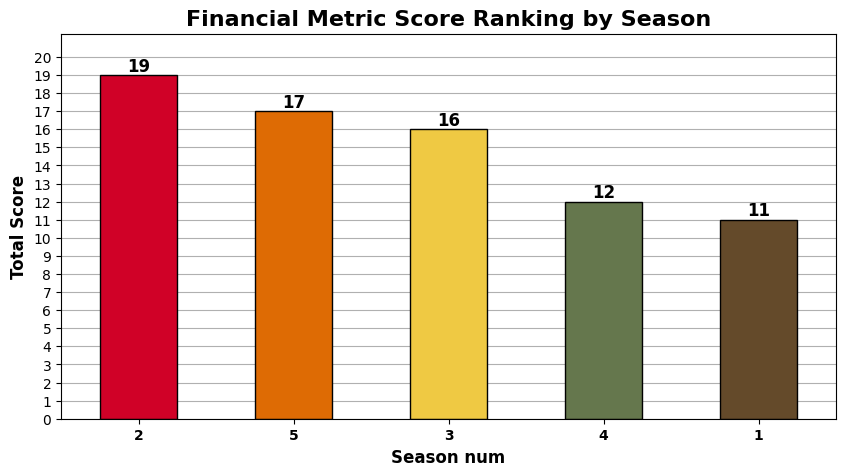

In [90]:
bar_plot_by_season(df=metric_ranking_df, 
                   height=5, 
                   width=10, 
                   color="bar_colors", 
                   ycol="total_score", 
                   ylabel="Total Score", 
                   title="Financial Metric Score Ranking by Season", 
                   xlabels_col="season_num")

#### **⚖️ Remarks**
* 🕵️ To my surprise, season 2 wins in financial metrics.
    * I thought season 2 and season 3 would be the top scoring as their financials were consistent and had low variance.
    * The fact that season 5 only won 2nd place by 1 point against season 3 further shows this intuition.
* 🕵️ Season 4 and 1 at the end makes sense.
    * Season 4 was weak as we see in the cumulative and total plots, plagued with both of the only negative profits.
    * Season 1 with only 8 episodes and low scale purchases and sales means it wouldn't have scored highly in all metrics.
* 🕵️ If we consider that a top score is 25, then we can see that
    * Season 2 almost averaged 2nd place for all categories.
    * Season 1 almost averaged 4th place for all categories.

## 1.7. Is there a correlation between the number of episodes in a season and financial performance?

* **🏹 To tackle this question:**
   * 🥇 First we will plot episode count against the score of section 1.6.
   * 🥈 Then we will consider a correlation matrix in a heatmap to visualise any other correlations.

### 1.7.1. Let's test out this theory with very basic data:

In [91]:
score_vs_num_episodes_df = metric_ranking_df.merge(season_episode_counts_df, on='season_num', how='inner')
correlation = round(score_vs_num_episodes_df['total_score'].corr(score_vs_num_episodes_df['episode_count']), 4)
print(f"Correlation between top score and number of episodes: {correlation}")

Correlation between top score and number of episodes: 0.5907


<AxesSubplot:xlabel='episode_count', ylabel='total_score'>

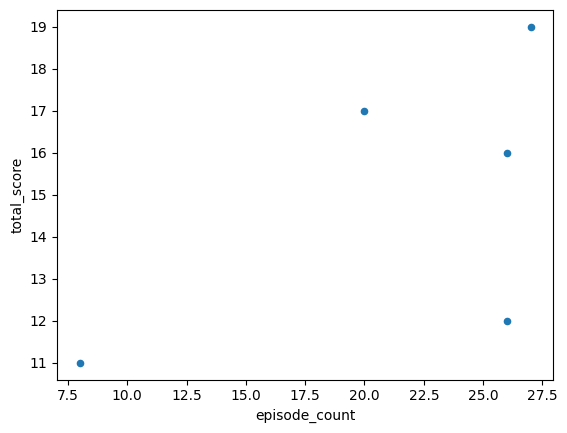

In [92]:
score_vs_num_episodes_df.plot(kind='scatter', x='episode_count', y='total_score')

## 👆 Can you put a stats chart here with more information? plot the actual line, too?
Basically, does episode count predict total score?

### 1.7.2. Let's try with a larger data table:

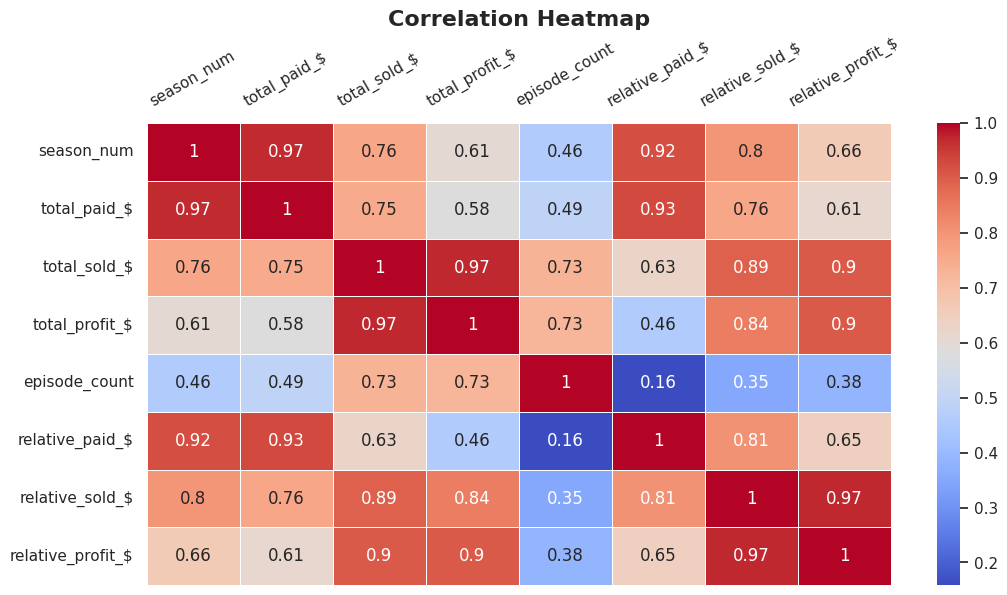

In [93]:
corr_matrix = df_relative_seasons.corr()
sns.set(style="white")  # Set the style of the heatmap

plt.figure(figsize=(12, 6))  # Set the size of the plot
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True, linewidths=.5)
heatmap.tick_params(right=False, top=False, labelright=False, labeltop=True, labelbottom=False, rotation=30)

# Rotate y-axis labels
for tick in heatmap.yaxis.get_major_ticks():
    tick.label.set_rotation(0)

plt.title("Correlation Heatmap", fontweight='bold', fontsize=16)
plt.show()

#### **⚖️ Remarks**
* 🕵️ The paid, sold and profit are correlated to each other due to Profit = Sold - Paid. 
    * Paid and sold, or paid and profit might be an interesting combination to test for predictive power.
* 🕵️ Season number correlates well with total paid.
    * As we saw in the total and cumulative plots, each successive season spends more money on storage unit purchases.
    * The relationship between season number and sold and profit remains positive but declines.
* 🕵️ There is a weak positive correlation of higher season number and more episodes, but season 5 breaks that trend.
* 🕵️ Episode count has a small positive correlation to relative paid, sold and profit.
    * Of course with more episodes and with each subsequent season, the relative financial metrics generally increase, so this correlation is expected.

# 2. Location Analysis

## 2.1. How many times did Allen and Ton visit each state in Total?

**🗺️ Before answering this question, we will need to modfify the location data from how it is currently presented.**
* We need to seperate the location sentence into a **state initial**, **state name** and for future use, **city name**.

### 2.1.1. Change Location String to State Initial, State Name and City Name Using API (⏳ ~10 minutes)

In [ ]:
def get_state_code_city_location_df(df, location_col_name, print_progress=False):
    """
    Pass in a dataframe with a location column name.
    Function will return the dataframe with a state_name, state_code and city_name columns.
    You should run this function AFTER checking if you have already collected the data to avoid waiting for the API calls.
    Sorry for the repeated try-except code. I don't want to spend time right now simplifying it.
    """
    # Initialize an empty list to store state codes
    state_names = []
    state_codes = []
    city_names = []
    
    # Generate a copy as to not affect the original dataframe.
    df_with_loc = df.copy()
    # print(df_with_loc)
    
    # We're gonna apply these columns here to make sure the list names are correct before running a 5-10 minute API call!
    df_with_loc['state_name'] = [np.nan] * len(df_with_loc)
    df_with_loc['state_code'] = [np.nan] * len(df_with_loc)
    df_with_loc['city_name'] = [np.nan] * len(df_with_loc)
    
    # count = 1
    length_df = len(df_with_loc)    
                         
    # Loop through each row
    for index, row in df_with_loc.iterrows():
        ep_ID = row['unique_ep_ID']
        location = row['location']

    # for location in df[location_col_name]:
        # Send a GET request to Nominatim API
        url = f"https://nominatim.openstreetmap.org/search?q={location}&format=json&addressdetails=1"
        response = requests.get(url)
        data = response.json()

        # Extract the state code from the response
        if len(data) > 0:
            # We only want to take the first result (0th index), assuming it is the most relevant/accurate.
            # Otherwise, we can scan the data response for a dictionary key 'country': 'United States'
            result = data[0] 
            if print_progress == True:
                print(f"== [{str(index+1).zfill(3)}/{length_df}] Episode {ep_ID} ======================================")

            try:
                state_name = result["address"]["state"]
                if print_progress == True:
                    print(f"🔎 Checking `{location}`...\n   ✔️ {state_name} 👍")
            except (AttributeError, TypeError, KeyError):
                if print_progress == True:
                    print(f"   ❌ Cannot get state name 😥")
                state_name = np.nan

            try:
                state_code = result["address"]["ISO3166-2-lvl4"].strip("US-")
                if print_progress == True:
                    print(f"   ✔️ {state_code} 👍")
            except (AttributeError, TypeError, KeyError):
                if print_progress == True:
                    print(f"   ❌ Cannot get state code 😥")                
                state_code = np.nan
                
            try:
                city_name = result["address"]["city"]
                if print_progress == True:
                    print(f"   ✔️ {city_name} 👍")
            except (AttributeError, TypeError, KeyError):
                if print_progress == True:
                    print(f"   ❌ Cannot get city name 😥")
                city_name = np.nan
        else:
            if print_progress == True:
                print(f"❌ No data in response for `{location}` 😥") 

        state_names.append(state_name)
        state_codes.append(state_code)
        city_names.append(city_name)
        
        # Wait between API calls.
        time.sleep(random.randint(5, 8))
        # count += 1
        print("")
    
    print("🏁 Finished!")

    # Add the state codes as a new column in the DataFrame for real.
    df_with_loc['state_name'] = state_names
    df_with_loc['state_code'] = state_codes
    df_with_loc['city_name'] = city_names

    return df_with_loc

In [ ]:
# Check if we've already run the API call.
if os.path.isfile(LOCATION_STATE_CODE_PICKLE):
    print(f"⚠️ '{LOCATION_STATE_CODE_PICKLE}' already exists. Skipping save operation. Handle existing data, then try again.")
    print(f">>>> 📂 Importing the existing file.")
    with open(LOCATION_STATE_CODE_PICKLE, 'rb') as file:
        state_code_city_df = pickle.load(file)
else:
    state_code_city_df = get_state_code_city_location_df(df, 'location', True)  
    with open(LOCATION_STATE_CODE_PICKLE, 'wb') as file:
        pickle.dump(state_code_city_df, file)
    print(f"✔️ '{LOCATION_STATE_CODE_PICKLE}' saved successfully!")

In [ ]:
state_code_city_df.head(1)

In [ ]:
state_code_city_df.info()

#### 2.1.1.1. How many city_name entries are empty?

In [ ]:
state_code_city_df.loc[:, 'city_name'].isnull().sum()

#### 2.1.1.2. Correcting the _null values_

Let's see if a simple .split(',')[0] can pull the city name from the location for most entries?

In [ ]:
state_code_city_df.loc[(state_code_city_df['city_name'].isnull()), ['unique_ep_ID', 'location', 'city_name']]

* We can see that for most locations with no city data, the city can be simply replaced with location.split(',')[0]. 
* But there are 2 values which will have to remain nan.
   * We will need to check that the location split list is longer than 2 elements.

In [ ]:
for index, row in state_code_city_df.iterrows():
    city_name = row['city_name']
    location = row['location']
    if pd.isnull(city_name):
        number_of_splits = len(location.split(','))
        if number_of_splits > 1:
            extracted_city_name = location.split(',')[0]
            print(f"✔️ Got city name: {extracted_city_name}.")
            state_code_city_df.at[index, 'city_name'] = extracted_city_name      
        else:
            print(f"❌ `{location}` has No apparent city name.")

In [ ]:
# Let's check again the empty city_name entries:
state_code_city_df.loc[(state_code_city_df['city_name'].isnull()), ['unique_ep_ID', 'location', 'city_name']]

### 2.1.X. How many times was each state visited in the entire series?

In [ ]:
state_visit_count_df = state_code_city_df.loc[:, ['season_num', 'episode_num', 'unique_ep_ID', 'location', 'state_name', 'state_code']]
# .size() makes each row a group. This method counts how many times each unique combination of 'state_name', and 'state_code' appears.
# Since the state name and state code represent the same thing, they are effectively counted as 1 item.
state_visit_count_df = state_code_city_df.groupby(['state_name', 'state_code']).size().reset_index(name='visits')
state_visit_count_sorted_df = state_visit_count_df.sort_values(by='visits', ascending=False)
state_visit_count_sorted_df['%'] = round((state_visit_count_sorted_df['visits'] / state_visit_count_sorted_df['visits'].sum()) * 100, 2)
state_visit_count_sorted_df

In [ ]:
states_visit_total_count = state_visit_count_sorted_df['state_code'].count()
print(f"Auction Hunters Visited a total of {states_visit_total_count} states over the entire series.")

* Evidently, California was the most popular choice of storage unit auctions.
* **WHY? Spike TV (production company) HQ is New York. Is it because there are more storage facilities in california? tv production staff?...**

**🗺️ Let's visualise it on the map 🗺️:**

In [ ]:
# Run this cell to see the color options
# fig = px.colors.sequential.swatches_continuous()
# fig.show()

In [ ]:
def draw_map_state_visits(df, map_title):
    """
    Pass in a dataframe with a state_code and 'visits' column with state codes and visit count respectedly, and output an interactive map.
    Also, a title for your map.
    """
    # Set the color scale to what you think looks good:
    color_scale = px.colors.sequential.Greens
    
    fig = px.choropleth(df, 
                        locations="state_code", 
                        color="visits",
                        hover_name="state_name", 
                        locationmode="USA-states",
                        width=1000,
                        height=600,
                        scope="usa",
                        color_continuous_scale=color_scale,
                        title=map_title)
    fig.show()

In [ ]:
draw_map_state_visits(state_visit_count_sorted_df, "Auction Hunters: States Visited in the Entire Series (Interactive Map)")

## 2.2. How many times did Allen and Ton visit each state in each Season?

### 2.2.1. Generate a dataframe that groups by _season_num_ and counts the number of times the same state appears.

In [ ]:
state_visit_count_by_season_df = state_code_city_df.groupby(['season_num', 'state_name', 'state_code']).size().reset_index(name='visits')
state_visit_count_by_season_df

### 2.2.2. Generate maps for each season

In [ ]:
def plot_map_and_bars(df, map_title, bar_title):
    """
    This function plots the season location data. Enter a dataframe which has grouped season locations, such as "state_visit_count_by_season_df"
    Then, simply assign the title you want to the plots and it will generate it.
    This function is designed to be run in a loop!
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Plotly Map
    map_fig = px.choropleth(df, 
                            locations="state_code", 
                            color="visits",
                            hover_name="state_name", 
                            locationmode="USA-states",
                            scope="usa",
                            color_continuous_scale='Greens')  # Set the color scale
    
    map_fig.update_layout(coloraxis_colorbar=dict(
        x=0.5, xanchor='center', y=-0.20, yanchor='bottom',  # Adjust these values
        thickness=16,  # Set the thickness to 20% of the map size
        len=0.85,  # Length of the color bar
        orientation='h',  # Horizontal orientation
        # Tick values on the color bar
        tickvals=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28],  # Specify the desired tick values
        tickfont=dict(size=18)  # Customize the tick font: increase text size and make it bold
    ))

    map_fig.write_image("map_figure.png")  # Save the Plotly figure as an image
    img = Image.open("map_figure.png")  # Open the saved image

    axes[0].imshow(img)  # Plot the image in the first subplot without ticks
    axes[0].axis('off')  # Turn off the axes
    axes[0].set_title(map_title, weight='bold', fontsize=14)  # Set the title for the bar plot subplot
    axes[0].set_aspect('auto')  # Adjust the aspect ratio as needed
    axes[0].autoscale(enable=True)  # Enable autoscaling to maximize the plot area

    # Bar Plot
    sns.barplot(x="state_code", 
                y="visits", 
                data=df, 
                hue="state_code", 
                dodge=False, 
                orient='v',
                palette="Set1",
                ax=axes[1],
                edgecolor="black")
    
    # Annotations
    for p in axes[1].patches:
        axes[1].annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12, color='black', weight="bold")
    
    axes[1].set_title(bar_title, weight='bold', fontsize=14)  # Set the title for the bar plot subplot
    axes[1].set_xlabel("state_code", fontsize=12, weight="bold")
    axes[1].set_ylabel("visits", fontsize=12, weight="bold")
    interval = math.ceil((df['visits'].max())/6) # here, I am dividing the plot into 6 y tick intervals.
    axes[1].yaxis.set_major_locator(mtick.MultipleLocator(interval))  # Adjust the interval (e.g., 2 for every 2 units)    
    axes[1].set_ylim(0, 1.15*(df['visits'].max()))
    axes[1].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    plt.grid(axis='y')  # Add gridlines to the bar plot

    plt.tight_layout()
    plt.show()

In [ ]:
season_numbering = [1, 2, 3, 4, 5]
for season in season_numbering:
    map_title = f"Auction Hunters: Season {season}\nStates Visited (Static Map)"
    bar_title = f"Auction Hunters: Season {season}\nStates Visited"
    season_df_to_plot = state_visit_count_by_season_df[state_visit_count_by_season_df['season_num'] == season]
    plot_map_and_bars(season_df_to_plot, map_title, bar_title)

In [ ]:
season_state_counts_df = state_visit_count_by_season_df.groupby('season_num')['state_code'].nunique().reset_index(name='unique_states_visited')
season_state_counts_df

In [ ]:
bar_plot_by_season(df=season_state_counts_df, 
                   color="Set1_colors", 
                   ycol="unique_states_visited", 
                   ylabel="Unique States Visited", 
                   title="Auction Hunters: Number of States Visited Per Season")

## 2.3. What is the monetary performance of each state over the series?

### 2.3.1. Merge Location Data with PM and ROI data for entire series

In [ ]:
state_code_city_df.head(1)

In [ ]:
loc_pm_roi_df = df_pm_roi.merge(state_code_city_df.loc[:, ['unique_ep_ID', 'state_name', 'state_code', 'city_name']], on='unique_ep_ID', how='left')
loc_pm_roi_df = loc_pm_roi_df.loc[:, ['season_num', 'episode_num', 'unique_ep_ID', 'episode_name', 'air_date', 'paid_$', 'sold_$', 'profit_$', 'profit_margin_%', 'roi_%', 'state_name', 'state_code', 'city_name']]
loc_pm_roi_df.sample(2)

### 2.3.2. Total Paid, Sold, and Profit by State for the Entire Series

In [ ]:
total_metrics_by_state_over_series_df = loc_pm_roi_df.groupby(['state_name', 'state_code'])[['paid_$', 'sold_$', 'profit_$']].sum().reset_index()
total_metrics_by_state_over_series_df

In [ ]:
def plot_monetary_metrics_by_state(df, width=12, height=6, title="generic title", annot_fsize=8, annot_rot=90, annot_ha="center", annot_va="bottom", annot_wei="bold", 
                                   paid_col="paid_$", sold_col="sold_$", prof_col="profit_$", leg_loc="best"):
    """
    This function will plot the monetary metrics by state in a bar plot.
    Specify a dataframe with paid_$, sold_$, profit_$, state_code and state_name for success!
    You can use this function in a loop or on a whole dataset.
    If you use it in a loop, make sure it is season by season, and reset the title!
    If you need to move the legend, use any of the following arguments: 
    "upper right", "upper left", "lower left", "lower right", "right", "center left", "center right", "lower center", "upper center", "center"
    """
    df4 = df.copy()

    fig, ax = plt.subplots(figsize=(width, height))

    states = df4['state_code'].unique()

    bar_width = 0.25
    index = np.arange(len(states))  # Using np.arange for better indexing

    plt.bar(index, df4[paid_col], bar_width, label=f'{paid_col.capitalize()}')
    plt.bar(index + bar_width, df4[sold_col], bar_width, label=f'{sold_col.capitalize()}')  # Adjusting index for the second bar
    plt.bar(index + 2 * bar_width, df4[prof_col], bar_width, label=f'{prof_col.capitalize()}')  # Adjusting index for the third bar
    

    # Loop to annotate the top of each bar
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f' ${height:,.0f}', (rect.get_x() + rect.get_width() / 2, height), 
                    ha=annot_ha, va=annot_va, fontsize=annot_fsize, weight=annot_wei, rotation=annot_rot)

    ax.set_xlabel('States', weight="bold")
    ax.set_ylabel('Dollar Amount ($)', weight="bold")
    ax.set_xticks(index + bar_width)  # Setting ticks at the middle of each group
    ax.set_xticklabels(states, rotation=0)

    ax.set_ylim(0, 1.25 * df4[[paid_col, sold_col, prof_col]].max().max())
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    ax.set_axisbelow(True)
    ax.grid(axis='y')

    plt.title(title, fontsize=16, weight="bold")
    plt.legend(loc=leg_loc)
    plt.tight_layout()
    plt.show()

In [ ]:
plot_monetary_metrics_by_state(df=total_metrics_by_state_over_series_df, width=12, height=6, title="Auction Hunters Series:\nTotal Monetary Metrics by State over Series", annot_fsize=9)

### 2.3.3. Relative Paid, Sold and Profit by State over the Series

In [ ]:
loc_pm_roi_df.head(2)

In [ ]:
total_metrics_by_state_over_series_visits_df = total_metrics_by_state_over_series_df.merge(state_visit_count_sorted_df.loc[:, ['state_code', 'visits']], on='state_code', how='left')
total_metrics_by_state_over_series_visits_df

In [ ]:
relative_metrics_by_state_over_series_visits_df = total_metrics_by_state_over_series_visits_df.copy()
relative_metrics_by_state_over_series_visits_df['relative_paid_$'] = round(relative_metrics_by_state_over_series_visits_df['paid_$'] / relative_metrics_by_state_over_series_visits_df['visits'], 2)
relative_metrics_by_state_over_series_visits_df['relative_sold_$'] = round(relative_metrics_by_state_over_series_visits_df['sold_$'] / relative_metrics_by_state_over_series_visits_df['visits'], 2)
relative_metrics_by_state_over_series_visits_df['relative_profit_$'] = round(relative_metrics_by_state_over_series_visits_df['profit_$'] / relative_metrics_by_state_over_series_visits_df['visits'], 2)
relative_metrics_by_state_over_series_visits_df

In [ ]:
plot_monetary_metrics_by_state(df=relative_metrics_by_state_over_series_visits_df,
                               width=12,
                               height=6,
                               title='Auction Hunters Series:\nPaid, Sold and Profit Relative to the Number of Times Visited each State',
                               annot_fsize=8,
                               annot_rot=90,
                               annot_ha='center',
                               annot_va='bottom',
                               annot_wei='bold',
                               paid_col='relative_paid_$',
                               sold_col='relative_sold_$',
                               prof_col='relative_profit_$',
                               leg_loc="upper left")

### 2.3.X. Total Paid, Sold, and Profit by State for each Season

In [ ]:
total_metrics_by_state_each_season_df = loc_pm_roi_df.groupby(['season_num', 'state_name', 'state_code'])[['paid_$', 'sold_$', 'profit_$']].sum().reset_index()
total_metrics_by_state_each_season_df

In [ ]:
season_numbering = [1, 2, 3, 4, 5]
for season in season_numbering:
    title = f"Auction Hunters: Season {season}\nTotal Monetary Metrics by State each Season"
    season_df_to_plot = total_metrics_by_state_each_season_df[total_metrics_by_state_each_season_df['season_num'] == season]
    plot_monetary_metrics_by_state(df=season_df_to_plot, 
                                   width=9, 
                                   height=4.5, 
                                   title=title, 
                                   annot_fsize=8, 
                                   annot_rot=60,
                                   annot_ha='left',
                                   annot_va='bottom',
                                   annot_wei='bold')

### 2.3.X. Relative Paid, Sold, and Profit by State for each Season

In [ ]:
# Group the data by season number, state name, and state code
grouped_df = loc_pm_roi_df.groupby(['season_num', 'state_name', 'state_code'])
# Count the number of visits for each state in each season
visits_per_season_df = grouped_df.size().reset_index(name='visits')
# Calculate the sum of monetary values for each state in each season
monetary_sum_per_season_df = grouped_df.agg({'paid_$': 'sum', 'sold_$': 'sum', 'profit_$': 'sum'}).reset_index()
# Merge the visits count and the monetary sum dataframes
total_metrics_by_state_by_season_visits_df = pd.merge(visits_per_season_df, monetary_sum_per_season_df, on=['season_num', 'state_name', 'state_code'])

In [ ]:
relative_metrics_by_state_by_season_visits_df = total_metrics_by_state_by_season_visits_df.copy()
relative_metrics_by_state_by_season_visits_df['relative_paid_$'] = round(relative_metrics_by_state_by_season_visits_df['paid_$'] / relative_metrics_by_state_by_season_visits_df['visits'], 2)
relative_metrics_by_state_by_season_visits_df['relative_sold_$'] = round(relative_metrics_by_state_by_season_visits_df['sold_$'] / relative_metrics_by_state_by_season_visits_df['visits'], 2)
relative_metrics_by_state_by_season_visits_df['relative_profit_$'] = round(relative_metrics_by_state_by_season_visits_df['profit_$'] / relative_metrics_by_state_by_season_visits_df['visits'], 2)
relative_metrics_by_state_by_season_visits_df

In [ ]:
season_numbering = [1, 2, 3, 4, 5]
for season in season_numbering:
    title = f"Auction Hunters: Season {season}\nMonetary Metrics by State each Season Relative to Number of Visits"
    season_df_to_plot = relative_metrics_by_state_by_season_visits_df[relative_metrics_by_state_by_season_visits_df['season_num'] == season]
    plot_monetary_metrics_by_state(df=season_df_to_plot, 
                                   width=9, 
                                   height=5.5, 
                                   title=title, 
                                   annot_fsize=8, 
                                   annot_rot=30,
                                   annot_ha='left',
                                   annot_va='bottom',
                                   annot_wei='bold',
                                   paid_col='relative_paid_$',
                                   sold_col='relative_sold_$',
                                   prof_col='relative_profit_$')

## 2.4. Which state had the best Profit Margin?

In [ ]:
pm_roi_by_state_over_series_visits_df = relative_metrics_by_state_over_series_visits_df.copy()
pm_roi_by_state_over_series_visits_df['profit_margin_%'] = round((pm_roi_by_state_over_series_visits_df['profit_$'] / pm_roi_by_state_over_series_visits_df['sold_$']) * 100, 2)
pm_roi_by_state_over_series_visits_df['roi_%'] = round((pm_roi_by_state_over_series_visits_df['profit_$'] / pm_roi_by_state_over_series_visits_df['paid_$']) * 100, 2)
pm_roi_by_state_over_series_visits_df

In [ ]:
plot_best_worst_three_eps(worst_df=pm_roi_by_state_over_series_visits_df.sort_values(by='profit_margin_%', ascending=True).head(3).reset_index(drop=True), 
                          best_df=pm_roi_by_state_over_series_visits_df.sort_values(by='profit_margin_%', ascending=False).head(3).reset_index(drop=True), 
                          category="profit_margin", 
                          left_caption="Lowest Profit Margin States", 
                          right_caption="Highest Profit Margin States", 
                          left_legend_pos="best", 
                          right_legend_pos="best",
                          datatype="states")

## 2.5. Which state had the best Return on Investment (ROI)?

In [ ]:
plot_best_worst_three_eps(worst_df=pm_roi_by_state_over_series_visits_df.sort_values(by='roi_%', ascending=True).head(3).reset_index(drop=True), 
                          best_df=pm_roi_by_state_over_series_visits_df.sort_values(by='roi_%', ascending=False).head(3).reset_index(drop=True), 
                          category="roi", 
                          left_caption="Lowest Return on Investment (ROI) States", 
                          right_caption="Highest Return on Investment (ROI) States", 
                          left_legend_pos="best", 
                          right_legend_pos="best",
                          datatype="states")

In [ ]:
# explanation

## 2.6. Which state has the best monetary performance over the entire series?

In [ ]:
def make_score_table_states(df_metrics, show_calcs=False):
    """
    You must insert the dataframe of relative metrics that looks like this:
    'state_name', 'state_code', 'relative_paid_$', 'relative_sold_$', 'relative_profit_$', 'profit_margin_%', 'roi_%'    
    From there, the score will be determined by ranking each criteria from best to worst (5 points to 1 point respectively).
    Output is a dataframe of state ranked by final score.
    
    show_calcs=True will print the interim tables where the calculations are performed. Use it to validate your scoring expectations.
    """
    df = df_metrics.copy()

    required_input_metrics = ['state_name', 'state_code', 'relative_paid_$', 'relative_sold_$', 'relative_profit_$', 'profit_margin_%', 'roi_%']
    missing_columns = [col for col in required_input_metrics if col not in df.columns]
    if missing_columns:
        raise ValueError(f"The following columns are missing in the dataframe: {', '.join(missing_columns)}")

    points_df_col_name = 'points'
    # Higher scorers will get a slight bias, lower scorers will get not much benefit.
    points_df = pd.DataFrame({points_df_col_name:[20, 18, 16, 14, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]})
    
    columns_to_rank = ['relative_paid_$', 'relative_sold_$', 'relative_profit_$', 'profit_margin_%', 'roi_%']
    
    asc_dict = {
        'relative_paid_$': True,
        'relative_sold_$': False,
        'relative_profit_$': False,
        'profit_margin_%': False,
        'roi_%': False
    }
    
    new_point_col_names = {
        'relative_paid_$': 'paid_points',
        'relative_sold_$': 'sold_points',
        'relative_profit_$': 'profit_points',
        'profit_margin_%': 'profit_margin_points',
        'roi_%': 'roi_points'
    }
    
    dfs_list = []
    # loop through each column
    for col in columns_to_rank:
        # make a new df with only location columns and the col to rank. Then. sort it by asc or desc by checking the dictionary.
        df1 = df.loc[:, ['state_name', 'state_code', col]].groupby(['state_name', 'state_code']).sum().reset_index()
        df1 = df1.sort_values(col, ascending=asc_dict[col]).reset_index(drop=True)
        # join this new df with the points df. points are now lined up with the metric.
        df1_with_points = pd.concat([df1, points_df], axis=1)
        # rename the points column to include the metric description. e.g. 'points' -> paid_points
        df1_with_points.rename(columns={points_df_col_name: new_point_col_names[col]}, inplace=True)
        # append this df to a list of dfs.
        dfs_list.append(df1_with_points)
        if show_calcs == True:
            print(f">> {col}")
            print(df1_with_points)
            print("")

    # start with the first df in the list
    points_df = dfs_list[0]
    # then start looping through all the remaining dfs in the list
    for df in dfs_list[1:]:
        # merge each df with the merge of previous ones.
        points_df = points_df.merge(df, on=['state_name', 'state_code'], how='left')
        
    # this list is the list of metric_points column names.
    sum_these_cols = list(new_point_col_names.values())
        
    # make a new column which is the integer sum of the above metric_column values.   
    points_df['total_score'] = points_df[sum_these_cols].sum(axis=1)
    
    # Sort the output df by total_score
    points_df = points_df.sort_values('total_score', ascending=False).reset_index(drop=True)
    
    if show_calcs == True:
        print("Points df")
        print(points_df)
        print("")

    # Select columns for the final result
    points_df_score_final = points_df[['state_name', 'state_code', 'total_score']]

    return points_df_score_final

In [ ]:
state_metric_ranking_df = make_score_table_states(pm_roi_by_state_over_series_visits_df, show_calcs=False)
state_metric_ranking_df

In [ ]:
bar_plot_by_season(df=state_metric_ranking_df, 
                   color="bar_colors", 
                   height=6,
                   width=12,
                   ycol="total_score", 
                   ylabel="Total Score", 
                   title="Financial Metric Score Ranking by State", 
                   xlabels_col="state_code",
                   use_tp_max=True,
                   gridax=True,
                   yaxis_on=False)

In [ ]:
# explanation

## 2.7. Is there a correlation between State and any financial metrics?

In [ ]:
# draw up a plot to visualise states vs. financial metrics

# 3. Seasonal Data

* We are about to begin studying the time affect on the show Auction Hunters.
* As you have noticed, we do not have a constant period or frequencyt between episodes from the start of season 1 to the end of season 5.
* This stage of the EDA will be purely educational, as we make these assumptions related to time:
   * Episodes air in order that they happened in real life.
   * Episodes air immediately after the contents of the episode is filmed.
* To perform the seasonal decomposition, I will aggregate the data by year and month to see if anything useful can be derived.

## 3.1. Have any of the financial measures or metrics followed a yearly pattern?
* e.g. Can you identify a specific time of the year where profit is high, and purchase price is low?
* e.g. Is there a correlation between a specific time of the year and financial metrics?

### 3.1.1. Generate a Dataframe with measures and metrics aggregated by month

In [ ]:
first_record = df_pm_roi.head(1)
last_record = df_pm_roi.tail(1)
first_and_last = pd.concat([first_record, last_record])
first_and_last

* **🙋 Notice that we have a dataframe that starts in November, 2010 and finishes in May, 2015.**
* **👉 After we aggregate this dataframe, we will need to pad it to start from Jan, 2010 and finish in Dec, 2015.**

In [ ]:
# Here, we will generate the missing dates and then prepare them to concatenate into a single dataframe.
missing_months_2010_df = pd.DataFrame({
    'air_date': pd.date_range(start='2010-01-01', end='2010-10-31', freq='M'),
    'paid_$': 0,  
    'sold_$': 0,  
    'profit_$':0,
    'profit_margin_%':0,
    'roi_%':0
})

missing_months_2015_df = pd.DataFrame({
    'air_date': pd.date_range(start='2015-06-01', end='2015-12-31', freq='M'),
    'paid_$': 0,  
    'sold_$': 0,  
    'profit_$':0,
    'profit_margin_%':0,
    'roi_%':0
})

missing_months_2010_df.set_index('air_date', inplace=True) 
missing_months_2015_df.set_index('air_date', inplace=True) 

In [ ]:
# Here, we will use a copy of the first dataframe to ensure no accidental re-writes.
df_pm_roi_for_seasonal = df_pm_roi.copy()
df_pm_roi_for_seasonal.set_index('air_date', inplace=True) 

In [ ]:
# Resample data to monthly frequency and aggregate metrics. NOTE: $ are summed, % are averaged.
monthly_aggregated = df_pm_roi_for_seasonal.resample('M').agg({
    'paid_$': 'sum',
    'sold_$': 'sum',
    'profit_$': 'sum',
    'profit_margin_%': 'mean',
    'roi_%': 'mean'
})

In [ ]:
# Concatenate the dataframes
concat_seasonal_df = pd.concat([missing_months_2010_df, monthly_aggregated, missing_months_2015_df], ignore_index=False)

In [ ]:
concat_seasonal_df.info()

In [ ]:
# Impute the NaN values with 0
impute_cols = ['profit_margin_%', 'roi_%']
concat_seasonal_df[impute_cols] = concat_seasonal_df[impute_cols].fillna(value=0)

# Create year and month indices columns
concat_seasonal_df['year'] = concat_seasonal_df.index.year
concat_seasonal_df['month'] = concat_seasonal_df.index.month

# Perform rounding
concat_seasonal_df['profit_margin_%'] = round(concat_seasonal_df['profit_margin_%'], 2)
concat_seasonal_df['roi_%'] = round(concat_seasonal_df['roi_%'], 2)

# Re-arrange the cols and rename the final df (if necessary).
df_seasonal_monthly_full = concat_seasonal_df.loc[:, ['paid_$', 'sold_$', 'profit_$', 'profit_margin_%', 'roi_%', 'year', 'month']]
df_seasonal_monthly_full

### 3.1.2. Let's visualise the measures and metrics aggregated by month:

In [ ]:
def plot_annual_metrics(df, metric):
    """
    Pass in a dataframe and a metric and this function will plot it's annual performance for each available year.
    * df must contain the annually aggregated measures and metrics
    * The column 'year' should exist to assist with plotting.
    * 'air_date' must be the index of the df.
    """
    df5 = df.copy()
    
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(12, 4))
    
    # Get list of years to loop through
    year_list = df5['year'].unique().tolist()
        
    # Loop through years and plot each year's data on the same axis
    for year in year_list:
        year_df = df5[df5['year'] == year]
        months = year_df.index.month
        metric_vals = year_df[metric]
        ax.plot(months, metric_vals, label=str(year), marker='o')  # Plot each year's data

    ax.set_xticks(range(1, 13))  # Set x-axis ticks for 12 months
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis labels
    ax.set_xlabel('Month', fontsize=12, fontweight="bold")  # Set X-axis label
    ax.set_ylabel(f"{metric.capitalize().replace('_', ' (')})", fontsize=12, fontweight="bold")  # Set Y-axis label
    ax.set_title(f"Auction Hunters: {metric.capitalize().replace('_', ' ')} - Annual Combined Trends", fontsize=16, fontweight="bold")  # Set plot title
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    ax.legend()  # Show legend with year labels
    ax.grid(axis='y')
    plt.show()  # Display the plot

In [ ]:
def plot_monthly_boxplots(df, metric):
    """
    Plot a boxplot showing the distribution of a metric across months.
    * df must contain the annually aggregated measures and metrics
    * The 'air_date' should be the index of the df.
    """
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df.index.month, y=df[metric], fliersize=8)
    plt.xlabel('Month', fontsize=12, fontweight="bold")
    plt.ylabel(f"{metric.capitalize().replace('_', ' (')})", fontsize=12, fontweight="bold")
    plt.title(f"Auction Hunters: {metric.capitalize().replace('_', ' ')} - Distribution", fontsize=16, fontweight="bold")
    plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # Use gca() to get the current axes instance    ax.grid(axis='y')
    plt.grid(axis='y')
    plt.show()

In [ ]:
def plot_total_annual_metrics(df, metric):
    """
    Pass in a dataframe and a metric and this function will plot it.
    * df must contain the annually aggregated measures and metrics
    * The column 'year' should exist to assist with plotting.
    * 'air_date' must be the index of the df.
    """
    df6 = df.copy()
    
    # Get list of years to loop through
    year_list = df6['year'].unique().tolist()

    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(12, 4))

    # initiate loop to plot each year against the measures/metrics.
    for year in year_list:
        year_df = df6[df6['year'] == year]
        time = year_df.index
        metric_vals = year_df[metric]
        ax.plot(time, metric_vals, label=str(year))  # Plot each year's data

    ax.set_xlabel('Year', fontsize=12, fontweight="bold")  # Set X-axis label
    ax.set_ylabel(f"{metric.capitalize().replace('_', ' (')})", fontsize=12, fontweight="bold")  # Set Y-axis label
    ax.set_title(f"Auction Hunters: {metric.capitalize().replace('_', ' ')} - Monthly Aggregated Series Trends", fontsize=16, fontweight="bold")  # Set plot title
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    ax.grid(axis='y')
    ax.legend()  # Show legend with year labels
    plt.show()  # Display the plot

In [ ]:
def plot_box_trend_annual_stacked(df, list_of_metrics):
    """
    Run this function to plot the above 3 plotting functions all together.
    You can use something like: list_of_metrics=['paid_$', 'sold_$', 'profit_$', 'profit_margin_%', 'roi_%']
    """
    for metric in list_of_metrics:
        plot_annual_metrics(df, metric)
        plot_monthly_boxplots(df, metric)
        plot_total_annual_metrics(df, metric)

In [ ]:
plot_box_trend_annual_stacked(df=df_seasonal_monthly_full,
                       list_of_metrics=['paid_$', 'sold_$', 'profit_$', 'profit_margin_%', 'roi_%'])

In [ ]:
# Explanation

### 3.1.3. Seasonal Decomposition of Metrics

* ✌️ I will demonstrate 2 approaches of Seasonal Decomposition:
   * **Additive and Multiplicative** models:
      * In additive models, the observations are the sum of the components: trend, seasonality, and residual (error). **O = T + S + R**.
      * Additive is appropriate when the magnitude of seasonal fluctuations or variations in the series doesn't depend on the `level` of the series.
      * In multiplicative models, the observations are the product of the components: trend, seasonality, and residual. **O = T x S x R**.
      * Multiplicative is suitable when the magnitude of the seasonal fluctuations or variations in the series changes proportionally with the `level` of the series. 
         * For instance, as the series values increase, the seasonal variations also increase proportionally.
      * `Level` refers to the baseline or average value around which the series fluctuates. 
         * It represents the central tendency of the data. 
         * The level of a time series can be understood as the typical value or the average value that the series oscillates around.

The concept of "level" is crucial in understanding the trend component of a time series. The trend component signifies the long-term movement or direction in the data. It describes whether the series is generally increasing, decreasing, or remaining relatively constant over time.
      
   
   * **LEOSS** models:
      * "LOcally WEighted Scatterplot Smoothing" is a non-parametric regression method used for modeling the relationship between variables, especially in cases where there isn't a clear linear relationship. 
      * LOESS fits multiple regression lines in local subsets of the data to capture non-linear relationships that might exist.
      * The approach involves taking small subsets of the data and fitting a polynomial regression model to these subsets. 
      * These local regressions are then combined to form a smooth curve that represents the overall trend in the data.
      * It's particularly useful when dealing with noisy or complex datasets and can provide a more flexible way to model relationships between variables that may not follow a linear pattern. 

In [ ]:
def seasonal_decomposition(df, metric, seas_decomp_or_stl='seas_decomp', stdevs=3):
    """
    Perform seasonal decomposition or Seasonal and Trend decomposition using Loess (STL) on a given dataframe's time-series metric.

    Parameters:
    - df (DataFrame): The input DataFrame containing a time-series index and metrics.
    - metric (str): The specific column name or metric to analyze within the DataFrame.
    - seas_decomp_or_stl (str, optional): Method selection for decomposition - 'seas_decomp' (default) for Seasonal Decomposition,
                                           'stl' for Seasonal and Trend decomposition using Loess.
    - stdevs (int, optional): The number of standard deviations to consider for anomaly detection. Default is 3.

    Returns:
    - anomalies_df (DataFrame): A DataFrame containing the data points identified as anomalies beyond the defined standard deviations.

    Description:
    This function conducts seasonal decomposition analysis on the provided time-series data to extract the trend, seasonal, and residual components. It supports two decomposition methods:
    - 'seas_decomp': Utilizes the 'additive' model for seasonal decomposition.
    - 'stl': Employs the Seasonal and Trend decomposition using Loess method for analysis.
    
    The outputs include a multi-plot visual analysis showing the original time series, trend, seasonal, and residual components of the provided metric. Additionally, it highlights anomalies outside the defined standard deviation bounds within the residual data.

    Example Usage:
    >>> anomalies = seasonal_decomposition(df=my_dataframe, metric='my_metric', seas_decomp_or_stl='seas_decomp', stdevs=3)
    """
    # Get the date range for the extra months (this will be used for plotting later)
    first_date = df.index[0]                        # set first index date as first date
    first_date_minus = first_date - timedelta(1/12) # subtract 1 month
    last_date = df.index[-1]                        # set last index date as last date
    last_date_plus = last_date + timedelta(1/12)    # add 1 month
    
    type_dict = {
        'seas_decomp': 'Seasonal Decomposition (Additive)',               
        'stl': 'STL with LEOSS'
    }
    
    model_name_full = type_dict[seas_decomp_or_stl]
    
    original_data = df[metric]
    if seas_decomp_or_stl == 'seas_decomp':
        result = seasonal_decompose(original_data, model='additive')
    elif seas_decomp_or_stl == 'stl':
        stl = STL(original_data)
        result = stl.fit()     
    else:
        print("Your Decomposition Selection is incorrect. Try: 'seas_decomp' or 'stl'.")
    
    trend, seasonal, residual = result.trend, result.seasonal, result.resid
    reconstructed_data_ts = seasonal + trend

    fig, axs = plt.subplots(6, 1, figsize=(10, 12))

    axs[0].plot(df[metric])
    axs[0].set_title(f"Original ({metric.replace('_', ' ').capitalize()}) Series (for {model_name_full})", fontsize=14, weight='bold')
    axs[0].grid(axis='both')
    axs[0].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # Apply formatting to the first plot

    axs[1].plot(trend)
    axs[1].set_title(f"Trend ({metric.replace('_', ' ').capitalize()}) of {model_name_full}", fontsize=12, weight='bold')
    axs[1].grid(axis='both')
    axs[1].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # Apply formatting to the second plot

    axs[2].plot(seasonal)
    axs[2].set_title(f"Seasonal ({metric.replace('_', ' ').capitalize()}) of {model_name_full}", fontsize=12, weight='bold')
    axs[2].grid(axis='both')
    axs[2].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # Apply formatting to the third plot

    axs[3].plot(residual)
    axs[3].set_title(f"Residual ({metric.replace('_', ' ').capitalize()}) of {model_name_full}", fontsize=12, weight='bold')
    axs[3].grid(axis='both')
    axs[3].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # Apply formatting to the fourth plot

    axs[4].plot(original_data, label="Original")
    axs[4].plot(reconstructed_data_ts, label="Trend + Seasonal")
    axs[4].set_title(f"Trend + Seasonal for ({metric.replace('_', ' ').capitalize()}) of {model_name_full}", fontsize=12, weight='bold')
    axs[4].grid(axis='both')
    axs[4].legend()
    axs[4].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # Apply formatting to the fifth plot
    
    # Detecting Anomolies, as defined as 3 standard deviations.
    # These are values that are more than 3 standard deviations away from the mean residual, 
    ## meaning they are anomolies beyond explanation of the trend and seasonal characteristics.
    residuals_mean = residual.mean()
    residuals_stdev = residual.std()
    lower_bound = residuals_mean - (stdevs * residuals_stdev)
    upper_bound = residuals_mean + (stdevs * residuals_stdev)
    axs[5].plot(residual)
    axs[5].set_title(f"Bound of {stdevs} Std. Devs. around the Mean ({metric.replace('_', ' ').capitalize()}) with {model_name_full}", fontsize=12, weight='bold')
    axs[5].grid(axis='both')
    axs[5].fill_between(residual.index, lower_bound, upper_bound, color='g', alpha=0.25, linestyle='--', linewidth=2)
    axs[5].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # Apply formatting to the fifth plot
    axs[5].set_xlim(first_date_minus, last_date_plus)  # Set x-axis limits
    
    plt.tight_layout()
    
    # Generate a dataframe that features all of the values for metric outside the standard deviations range in the residuals.
    anomalies_df = original_data[(residual < lower_bound) | (residual > upper_bound)].to_frame()
    anomalies_df.rename(columns={metric: f"{metric}_anomaly"}, inplace=True)

    return anomalies_df

In [ ]:
sd_paid_plot_and_df = seasonal_decomposition(df=df_seasonal_monthly_full, metric='paid_$', seas_decomp_or_stl='seas_decomp')
sd_paid_plot_and_df

In [ ]:
# explanation

In [ ]:
sd_sold_plot_and_df = seasonal_decomposition(df=df_seasonal_monthly_full, metric='sold_$', seas_decomp_or_stl='seas_decomp')
sd_sold_plot_and_df

In [ ]:
# explanation

In [ ]:
sd_profit_plot_and_df = seasonal_decomposition(df=df_seasonal_monthly_full, metric='profit_$', seas_decomp_or_stl='seas_decomp')
sd_profit_plot_and_df 

In [ ]:
# explanation

In [ ]:
sd_pm_plot_and_df = seasonal_decomposition(df=df_seasonal_monthly_full, metric='profit_margin_%', seas_decomp_or_stl='seas_decomp')
sd_pm_plot_and_df

In [ ]:
# explanation

In [ ]:
sd_roi_plot_and_df = seasonal_decomposition(df=df_seasonal_monthly_full, metric='roi_%', seas_decomp_or_stl='seas_decomp')
sd_roi_plot_and_df

In [ ]:
# explanation

In [ ]:
# Write a function to display the metrics of a particular month as a df, so that we can see what episodes are output as anomalies.

In [ ]:
# use the explanation fields to answer the below questions. 

# 4. Ratings Analysis

**🍀 I was lucky enough to get 2 sources of episode rating data!**
* 😥 However, there are some episodes which had no data.
* 💪 Let's see what insights we can get about Auction Hunters with the data we have!

In [ ]:
df.head(2)

* **👉 rating and votes are scraped data from IMDB**
* **👉 api_rating and api_votes are (you guessed it!) data from trakt API**

In [ ]:
df_ratings_simple = df.drop(columns=['location', 'description', 'paid_$', 'sold_$', 'profit_$'])
df_ratings_simple

In [ ]:
df_ratings_simple_describe = df_ratings_simple[['rating','api_rating']].describe()
df_ratings_simple_describe

In [ ]:
# Plotting boxplots for both ratings columns
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_ratings_simple[['rating','api_rating']])
plt.title('Boxplots for ratings (IMDB) and api_ratings (Trakt)', weight='bold', fontsize=12)
plt.xlabel('Source', weight='bold')
plt.ylabel('Rating (/10)', weight='bold')
plt.grid(True)
plt.show()

* **👽 There is more ratings data in the api_rating column, however the variance is very low.**
* **The standard deviation is only 0.278, which means the ratings from this source are very close to the average.**
* **Sadly, there are so many missing ratings in the IMDB scrape data 'rating' such that it's difficult to analyze it.**

## 4.1. What is the best and worst rated episode per season?

* **⚠️ We have 2 sources of ratings data. Where possible, both will be used.**
* **⚠️ Where too many ratings are missing, only 1 source will be used.**

In [ ]:
api_ratings_min_seasons_df = min_or_max_feature_by_season(dataframe=df_ratings_simple, min_or_max='min', feature_col='api_rating', show_table=True)
api_ratings_max_seasons_df = min_or_max_feature_by_season(dataframe=df_ratings_simple, min_or_max='max', feature_col='api_rating', show_table=True)

In [ ]:
def plot_min_max_ep_ratings_by_season(min_df, max_df, x_col, source_df):
    """
    Use the function min_or_max_feature_by_season to generate your min_df and max_df. It should be a df with 5 rows, 1 episode from each season with the min or max category.
    Then, pass through your x_col (metric / column name).
    min_df/max_df must have columns: season_num, episode_name, unique_ep_ID
    To avoid re-writing the min max df generator, I will throw in the source_df so that I can pull out the vote count data directly from the unique_ep_ID tag.
    """
    
    ax_font_size = 10
    title_font_size = 12
    annot_font_size = 8
    ax_ticks_font_size = 8
    
    if x_col not in ["rating", "api_rating", "votes", "api_votes"]:
        raise ValueError('min_or_max argument must be "rating", "api_rating", "votes", "api_votes". Check input and try again.') 
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))
    
    # Plot minimum values on the left subplot
    ax1 = sns.barplot(x=x_col, 
                     y="season_num", 
                     data=min_df, 
                     hue="season_num", 
                     dodge=False, 
                     orient='h',
                     palette="Set1",
                     ax=axes[0],
                     edgecolor="black")
    
    ##### LEFT MIN PLOT ######

    for index, row in min_df.iterrows():
        vote_count = int(source_df[source_df['unique_ep_ID'] == int(row['unique_ep_ID'])]['api_votes'])
        ax1.text(row[x_col], 
                 index, 
                 f" Ep# {row['unique_ep_ID']}: ({row[x_col]:,.2f} Ra / {vote_count} Vo)\n {row['episode_name']}",  
                 va='center').set_fontsize(annot_font_size)

    ax1.set_xlabel(f"{x_col.capitalize()} (/10)", fontsize=ax_font_size, weight="bold")
    ax1.set_ylabel('Season #', fontsize=ax_font_size, weight="bold")
    ax1.set_title(f"Auction Hunters: Episodes of Min {x_col.capitalize()}", weight='bold', fontsize=title_font_size)
    # ax1.set_xlim(0, min_df[x_col].max() + 10000)
    ax1.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)

    if min_df[x_col].min() > 0:
        ax1.set_xlim(0.75*min_df[x_col].min(), 1.50*min_df[x_col].max())
    else:
        ax1.set_xlim(1.25*min_df[x_col].min(), 1.50*min_df[x_col].max())

    ax1.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))
    ax1.grid(axis='x')

    ##### RIGHT MAX PLOT ######

    ax2 = sns.barplot(x=x_col, 
                     y="season_num", 
                     data=max_df, 
                     hue="season_num", 
                     dodge=False, 
                     orient='h',
                     palette="Set1",
                     ax=axes[1],
                     edgecolor="black")

    for index, row in max_df.iterrows():
        vote_count = int(source_df[source_df['unique_ep_ID'] == int(row['unique_ep_ID'])]['api_votes'])
        ax2.text(row[x_col], 
                 index, 
                 f" Ep# {row['unique_ep_ID']}: ({row[x_col]:,.2f} Ra / {vote_count} Vo)\n {row['episode_name']}", 
                 va='center').set_fontsize(annot_font_size)

    ax2.set_xlabel(f"{x_col.capitalize()} (/10)", fontsize=ax_font_size, weight="bold")
    ax2.set_ylabel('Season #', fontsize=ax_font_size, weight="bold")
    ax2.set_title(f"Auction Hunters: Episodes of Max {x_col.capitalize()}", weight='bold', fontsize=title_font_size)
    ax2.set_xlim(0, 1.5*max_df[x_col].max())
    ax2.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)
    
    if max_df[x_col].min() > 0:
        ax2.set_xlim(0.75*max_df[x_col].min(), 1.40*max_df[x_col].max())
    else:
        ax2.set_xlim(1.25*max_df[x_col].min(), 1.40*max_df[x_col].max())

    ax2.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))
    ax2.grid(axis='x')
    
    plt.tight_layout()
    plt.show()

In [ ]:
plot_min_max_ep_ratings_by_season(min_df=api_ratings_min_seasons_df, max_df=api_ratings_max_seasons_df, x_col="api_rating", source_df=df_ratings_simple)

In [ ]:
# explanation

## 4.2. What are the top / worst 3 rated episodes of the series?

In [ ]:
def plot_best_worst_three_eps_ratings(worst_df, best_df, category: str, left_caption, right_caption, left_legend_pos="best", right_legend_pos="best", datatype="finance", x_col_1_10=False):
    """
    Choose a category such as paid, sold, profit. Then pass in your best and worst dataframes from the selected category.
    You need to add a caption to the left and right graph as appropriate.
    If you need to move the legend, use any of the following arguments: 
    "upper right", "upper left", "lower left", "lower right", "right", "center left", "center right", "lower center", "upper center", "center"
    datatype will specify the axis labels, so use finance for $ or %, states for state symbols, or ratings for pure numbers. 
    """
    
    ax_font_size = 10
    title_font_size = 12
    annot_font_size = 8
    ax_ticks_font_size = 8
    
    cat_to_col_dict = {
        "paid":"paid_$", 
        "sold":"sold_$", 
        "profit":"profit_$",
        "profit_margin": "profit_margin_%",
        "roi": "roi_%",
        "rating":"rating",
        "api_rating":"api_rating",
        "votes":"votes",
        "api_votes":"api_votes"
    }
    
    units_dict = {
        "paid":"$", 
        "sold":"$", 
        "profit":"$",
        "profit_margin": "%",
        "roi": "%",
        "rating":"/10",
        "api_rating":"/10",
        "votes":"#",
        "api_votes":"",
    }  
    
    if category not in cat_to_col_dict.keys():
        raise ValueError("Category argument invalid. Check input and try again.") 
    
    x_col = cat_to_col_dict[category]   
    ylabels = ['1st', '2nd', '3rd']
    
    units = units_dict[category]
    if units == "$":
        axis_format = '${x:,.0f}'
    elif units == "%":
        axis_format = '{x:,.0f}%'
    else:
        axis_format = '{x:,.2f}'

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    
    ##### LEFT MIN PLOT ######

    # 1. Plot minimum values on the left subplot 
    if x_col_1_10 == True:
        x_col = '1' 
    ax1 = sns.barplot(x=x_col, 
                     y=ylabels, 
                     data=worst_df, 
                     hue=ylabels, 
                     dodge=False, 
                     orient='h',
                     palette=['#3C76B9','#558EB4','#859DAD'],
                     # palette="Set2",
                     ax=axes[0],
                     edgecolor='black')
    
    # 2. Plot the annotations on the plot 
    if datatype == "finance":
        for index, row in worst_df.iterrows():
            value_min = f"${row[x_col]:,.0f}" if units == "$" else f"{row[x_col]:,.2f}%"  # Format the value based on units
            ax1.text(row[x_col], index, f" Ep# {row['unique_ep_ID']} ({value_min})\n {row['episode_name']}", va='center').set_fontsize(annot_font_size)
    elif datatype == "states":
        for index, row in worst_df.iterrows():
            value_worst = f"${row[x_col]:,.0f}" if units == "$" else f"{row[x_col]:,.2f}%"  # Format the value based on units
            ax1.text(row[x_col], index, f" {row['state_name']} ({row['state_code']})\n {row['visits']} visits @ {value_worst}", va='center').set_fontsize(annot_font_size)
    elif datatype == "rating":
        for index, row in worst_df.iterrows():
            vote_count = int(worst_df[worst_df['unique_ep_ID'] == int(row['unique_ep_ID'])]['api_votes'])
            ax1.text(row[x_col], index, f" Ep# {row['unique_ep_ID']}: ({row[x_col]:,.2f} Ra / {vote_count} Vo)\n {row['episode_name']}", va='center').set_fontsize(annot_font_size)
    elif datatype == "vote_count":
        for index, row in worst_df.iterrows():
            vote_count = int(worst_df[worst_df['unique_ep_ID'] == int(row['unique_ep_ID'])]['api_votes'])
            ax1.text(row[x_col], index, f" Ep# {row['unique_ep_ID']}: ({row[x_col]:.0f}/{vote_count} Votes)\n {row['episode_name']}", va='center').set_fontsize(annot_font_size)
    else:
        print("datatype not recognised, so no labels")
    
    # 3. Plot the decorators and specify the formatting
    ax1.set_xlabel(f"{category.capitalize()} ({units})", fontsize=ax_font_size, weight="bold")
    ax1.set_ylabel('Ranking', fontsize=ax_font_size, weight="bold")
    ax1.set_title(f"Auction Hunters: {left_caption}", weight='bold', fontsize=title_font_size)
    # ax1.set_xlim(0, min_df[x_col].max() + 10000)
    ax1.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)
    ax1.xaxis.set_major_formatter(mtick.StrMethodFormatter(axis_format))
    ax1.grid(axis='x')
    ax1.legend(loc=left_legend_pos)

    # 4. For the minimum only, with potential negative numbers, specify the plotting range.
    if worst_df[x_col].min() > 0:
        ax1.set_xlim(0.70*worst_df[x_col].min(), 1.25*worst_df[x_col].max())
    else:
        ax1.set_xlim(1.25*worst_df[x_col].min(), 1.25*worst_df[x_col].max())

    ##### RIGHT MAX PLOT ######
    
    # 1. Plot minimum values on the left subplot
    if x_col_1_10 == True:
        x_col = '10' 
    ax2 = sns.barplot(x=x_col, 
                     y=ylabels, 
                     data=best_df, 
                     hue=ylabels, 
                     dodge=False, 
                     orient='h',
                     palette=['#D1495B','#E9724C','#FFC857'],
                     # palette="Set2",
                     ax=axes[1],
                     edgecolor='black')
    
    # 2. Plot the annotations on the plot 
    if datatype == "finance":
        for index, row in best_df.iterrows():
            value_best = f"${row[x_col]:,.0f}" if units == "$" else f"{row[x_col]:,.2f}%"  # Format the value based on units
            ax2.text(row[x_col], index, f" Ep# {row['unique_ep_ID']} ({value_best})\n {row['episode_name']}", va='center').set_fontsize(annot_font_size)
    elif datatype == "states":
        for index, row in best_df.iterrows():
            value_best = f"${row[x_col]:,.0f}" if units == "$" else f"{row[x_col]:,.2f}%"  # Format the value based on units
            ax2.text(row[x_col], index, f" {row['state_name']} ({row['state_code']})\n {row['visits']} visits @ {value_best}", va='center').set_fontsize(annot_font_size)
    elif datatype == "rating":
        for index, row in best_df.iterrows():
            vote_count = int(best_df[best_df['unique_ep_ID'] == int(row['unique_ep_ID'])]['api_votes'])
            ax2.text(row[x_col], index, f" Ep# {row['unique_ep_ID']}: ({row[x_col]:,.2f} Ra / {vote_count} Vo)\n {row['episode_name']}", va='center').set_fontsize(annot_font_size)
    elif datatype == "vote_count":
        for index, row in best_df.iterrows():
            vote_count = int(best_df[best_df['unique_ep_ID'] == int(row['unique_ep_ID'])]['api_votes'])
            ax2.text(row[x_col], index, f" Ep# {row['unique_ep_ID']}: ({row[x_col]:.0f}/{vote_count} Votes)\n {row['episode_name']}", va='center').set_fontsize(annot_font_size)
    else:
        print("datatype not recognised, so no labels")
    
    # 3. Plot the decorators and specify the formatting
    ax2.set_xlabel(f"{category.capitalize()} ({units})", fontsize=ax_font_size, weight="bold")
    ax2.set_ylabel('Ranking', fontsize=ax_font_size, weight="bold")
    ax2.set_title(f"Auction Hunters: {right_caption}", weight='bold', fontsize=title_font_size)
    ax2.set_xlim(0, 1.60* best_df[x_col].max())
    ax2.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)
    ax2.xaxis.set_major_formatter(mtick.StrMethodFormatter(axis_format))
    ax2.grid(axis='x')
    ax2.legend(loc=right_legend_pos)
    
    if best_df[x_col].min() > 0:
        ax2.set_xlim(0.70*best_df[x_col].min(), 1.35*best_df[x_col].max())
    else:
        ax2.set_xlim(1.25*best_df[x_col].min(), 1.35*best_df[x_col].max())

    plt.tight_layout()
    plt.show()

In [ ]:
df_ratings_top3 = df_ratings_simple.sort_values(by=['api_rating'], ascending=False).head(3).reset_index(drop=True)
df_ratings_worst3 = df_ratings_simple.sort_values(by=['api_rating'], ascending=True).head(3).reset_index(drop=True)

In [ ]:
plot_best_worst_three_eps_ratings(worst_df=df_ratings_worst3, 
                                  best_df=df_ratings_top3, 
                                  category='api_rating', 
                                  left_caption="Bottom 3 API Ratings", 
                                  right_caption="Top 3 API Ratings", 
                                  left_legend_pos="upper right", 
                                  right_legend_pos="lower right", 
                                  datatype="rating")

## 4.3. What is the distrubution of rating scores per season?

### 4.3.1. Let's Visualise The Distribution of Rating Scores over each season!

In [ ]:
def plot_histogram_ratings(df, title):
    """
    Draws a histogram for the entered dataframe and specified column.
    """
    fsize = 12
    tsize = 15
    # Create a 1x1 subplot figure
    fig, ax = plt.subplots(figsize=(8, 4))
    
    ten_colors = sns.color_palette("Set3").as_hex()[0:10]
    
    ratings_counts_df = df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']].sum()
    ratings_counts_df.plot(kind='bar', color=ten_colors, edgecolor='black')

    # Loop to annotate the top of each bar
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f' {height:,.0f}', (rect.get_x() + rect.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, weight='bold', rotation=0)

    plt.xlabel('Rating (/10)', fontsize=fsize, weight='bold')
    plt.ylabel('Num Votes', fontsize=fsize, weight='bold')
    plt.title(title, fontsize=tsize, weight='bold')
    ax.set_ylim(0, 1.1*(ratings_counts_df.max()))
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    ax.set_axisbelow(True)
    ax.grid(axis='y')
    plt.xticks(rotation=0) 
    plt.tight_layout() 
    plt.show()

## 👇This would be awesome to have a % in it, too!

In [ ]:
season_number_list = [1,2,3,4,5]
for season in season_number_list:
    season_rat_data = df_ratings_simple[df_ratings_simple['season_num'] == season]
    plot_histogram_ratings(df=season_rat_data, title=f"Auction Hunters: Season {season} Ratings Distribution")

### 4.3.2. What is the Averate Rating by Season?

In [ ]:
season_average_ratings = df_ratings_simple.groupby(by=['season_num'])[['rating','api_rating']].mean().round(2)
season_average_ratings.reset_index(inplace=True)
season_average_ratings

In [ ]:
def ratings_bar_plot(df):
    """
    Input a dataframe of [season_num, rating, api_rating] and get a plot of each season vs the ratings data.
    season_df has the season data already computed, 
    """
    ratings_df = df.groupby(by=['season_num'])[['rating','api_rating']].mean().round(2)
    ratings_df.reset_index(inplace=True)
    
    ax = ratings_df.plot(
        x='season_num', 
        y=['rating', 'api_rating'], 
        kind="bar", 
        figsize=(8, 4),
        edgecolor='black',
        color=['#006E90', '#F18F01'])

    # labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, weight='bold', color='black', rotation=00)
        
    # Horizontal lines for average values
    avg_rating = df['rating'].mean()
    avg_api_rating = df['api_rating'].mean()
    ax.axhline(avg_rating, color='#006E90', linestyle='--', label=f'Avg Rating: {avg_rating:.2f}')
    ax.axhline(avg_api_rating, color='#F18F01', linestyle='--', label=f'Avg API Rating: {avg_api_rating:.2f}')
    # Annotate the horizontal lines to the left
    ax.annotate(f'{avg_rating:.2f}', xy=(-0.75, avg_rating+0.05), fontsize=10, color='black', weight='bold')
    ax.annotate(f'{avg_api_rating:.2f}', xy=(-0.75, avg_api_rating+0.05), fontsize=10, color='black', weight='bold')

    # Extend the y axis a little bit and format the numbers to have commas.
    min_val = math.floor(ratings_df.loc[:, ['rating','api_rating']].min().min())
    max_val = math.ceil(ratings_df.loc[:, ['rating','api_rating']].max().max())
    ax.set_ylim(min_val-0.5, max_val+0.5)
    ax.set_xlim(-0.85, 4.5)
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_axisbelow(True)

    # Make the title and axis texts bold
    ax.set_title("Auction Hunters: Average Season Ratings", fontsize=14, fontweight="bold")
    ax.set_xlabel("Season #", fontsize=12, fontweight="bold")
    ax.set_ylabel("Rating", fontsize=12, fontweight="bold")
    ax.grid(axis='y')

    plt.show()

In [ ]:
ratings_bar_plot(df_ratings_simple)

In [ ]:
# It looks like for api_rating, we could get a strong correlation of average season rating with number of episodes!
# The more episodes in a season, the more likely an episode in that season is to get rated higher.
# Albeit, the difference is relatively minute - min7.44 max7.87 it's not particularly significant.
# Verdict.. not really important, probably a coincidence.

## 4.4. What is the distribution of rating scores of the series?

### 4.4.1. Let's Visualise The Distribution of Rating Scores over the series!

In [ ]:
plot_histogram_ratings(df=df_ratings_simple, title="Auction Hunters: Series Ratings Distribution")

In [ ]:
# explanation

### 4.4.2. What is the Average Rating over the Series?

In [ ]:
series_average_ratings = df_ratings_simple.loc[:, ['rating','api_rating']].mean().round(2).to_frame().T
series_average_ratings

## 4.5. Is there any Correlation/Trend between the IMDB rating data and the API rating data?

In [ ]:
def draw_ratings_or_votes(df, col_1, col_2, xlabel, ylabel, plot, window=5, index='index', col_1_on=True, col_2_on=True, col_1_mean=True, col_2_mean=True):
    """
    Plot ratings from two specified columns against a chosen index.

    Parameters:
    - df: DataFrame containing the data
    - col_1: Name of the first column to plot (string)
    - col_2: Name of the second column to plot (string)
    - xlabel: Label for the x-axis (string)
    - ylabel: Label for the y-axis (string)
    - plot: Define the type of plot, "ratings" or "votes".
    - window: Size of the rolling window for mean calculation (default: 5)
    - index: Chosen index for plotting (default: 'index')
    - col_1_on: Show or hide the first column (default: True)
    - col_2_on: Show or hide the second column (default: True)
    - col_1_mean: Show or hide the rolling mean for the first column (default: True)
    - col_2_mean: Show or hide the rolling mean for the second column (default: True)

    Returns:
    - Displays a plot showing the specified columns against the chosen index with optional rolling means.

    Example:
    draw_ratings_or_votes(my_dataframe, 'rating', 'api_rating', 'Index', 'Ratings', index='air_date')
    """
    
    df_rv = df.copy()  
    plt.figure(figsize=(12, 6))  # Set the figure size 

    if index=='index':
        x = df_rv.index 
        plt.xticks(range(0, len(df_rv), 10))
        title=f'Auction Hunters: IMDB and API {plot} vs. Index (episodes in order)'
    if index=='air_date':
        x = df_rv.air_date
        title=f'Auction Hunters: IMDB and API {plot} vs. Air Date'

    # Two columns for y-axis values
    y1 = df_rv[col_1]
    y2 = df_rv[col_2]

    # Plotting both columns against the index
    if col_1_on == True:
        plt.plot(x, y1, label=f"{col_1.capitalize()}", linewidth=2) 
    if col_2_on == True:
        plt.plot(x, y2, label=f"{col_2.capitalize()}", linewidth=2) 

    # Calculate a rolling mean for 'rating' and 'api_rating' columns
    if col_1_mean == True:
        col_1_mean_title = f"{col_1}_rolling_mean"
        df_rv[col_1_mean_title] = df_rv[col_1].rolling(window=window).mean()
        plt.plot(x, df_rv[col_1_mean_title], color='red', label=f"{col_1.capitalize()} Rolling Mean")
    
    if col_2_mean == True:
        col_2_mean_title = f"{col_2}_rolling_mean"
        df_rv[col_2_mean_title] = df_rv[col_2].rolling(window=window).mean()
        plt.plot(x, df_rv[col_2_mean_title], color='green', label=f"{col_2.capitalize()} Rolling Mean")
        
    y_min, y_max = plt.ylim()
    x_min, x_max = plt.xlim()
    text_yloc = y_min + 0.25*(y_max-y_min)
    text_xloc = x_min + 0.75*(x_max-x_min)
    
    if (col_1_mean == True or col_2_mean == True) and index=='index':
        plt.text(text_xloc, text_yloc, f'Rolling Mean Window = {window}', fontsize=10, color='black', weight='bold')
    if (col_1_mean == True or col_2_mean == True) and index=='air_date':
        plt.text(text_xloc, text_yloc, f' Rolling Mean Window = {window}', fontsize=10, color='black', weight='bold')    

    plt.xlabel(xlabel, weight='bold', fontsize=12)
    plt.ylabel(ylabel, weight='bold', fontsize=12)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.title(title, weight='bold', fontsize=14)
    plt.show()

### 4.5.1. Ratings vs. Episode Index (episodes in order of appearance)

In [ ]:
draw_ratings_or_votes(df=df_ratings_simple, 
                      col_1='rating', 
                      col_2='api_rating', 
                      ylabel='Rating (/10)',
                      plot="Rating",
                      xlabel='Index',
                      index='index',
                      col_1_on=True,
                      col_1_mean=True,
                      col_2_on=True,
                      col_2_mean=True)

### 4.5.2. Rolling Mean vs. Index

In [ ]:
draw_ratings_or_votes(df=df_ratings_simple, 
                      col_1='rating', 
                      col_2='api_rating', 
                      ylabel='Rating (/10)', 
                      plot="Rating",
                      xlabel='Index',
                      index='index',
                      col_1_on=False,
                      col_1_mean=True,
                      col_2_on=False,
                      col_2_mean=True)

In [ ]:
# explanation

### 4.5.3. Ratings vs. Air Date

In [ ]:
draw_ratings_or_votes(df=df_ratings_simple, 
                      col_1='rating', 
                      col_2='api_rating', 
                      ylabel='Rating (/10)',
                      plot="Rating",
                      xlabel='Air Date',
                      index='air_date',
                      col_1_on=True,
                      col_1_mean=True,
                      col_2_on=True,
                      col_2_mean=True)

In [ ]:
# comment on missing data and trends.

### 4.5.4. Rolling Mean vs. Air Date

In [ ]:
draw_ratings_or_votes(df=df_ratings_simple, 
                      col_1='rating', 
                      col_2='api_rating', 
                      ylabel='Rating (/10)', 
                      plot="Rating",
                      xlabel='Air Date',
                      index='air_date',
                      col_1_on=False,
                      col_1_mean=True,
                      col_2_on=False,
                      col_2_mean=True)

In [ ]:
# explanation

## 4.6. Is there any correlation between api_rating and location (number of visits)?

In [ ]:
state_code_city_df_minimum = state_code_city_df.loc[:, ['unique_ep_ID', 'state_name', 'state_code', 'city_name']]
df_ratings_locations = df_ratings_simple.merge(state_code_city_df_minimum, on='unique_ep_ID', how='left')
df_ratings_locations.head(3)

In [ ]:
df_ratings_locations_sorted_agg = df_ratings_locations.groupby(by=['state_name', 'state_code'])['api_rating'].mean().reset_index()
df_ratings_locations_sorted_agg['api_rating'] = round(df_ratings_locations_sorted_agg['api_rating'], 2)
df_ratings_locations_sorted_agg_visits = df_ratings_locations_sorted_agg.merge(state_visit_count_sorted_df[['state_code', 'visits']], on='state_code', how='left')
df_ratings_locations_sorted_agg_visits

In [ ]:
def boxplot_states(df, title, xdata_col, xlabel, ydata_col, ylabel, xtick_ro=45):
    """
    Takes a dataframe with rating data and state codes and state names.
    """
    # copy df as to not modify it.
    df7 = df.copy()
    plt.figure(figsize=(12, 6))
    # plot the data in the desired order
    state_data_sorted = df7.sort_values(xdata_col)
    sns.boxplot(x=xdata_col, y=ydata_col, data=df)
    
    plt.xlabel(xlabel, weight='bold', fontsize='12')
    plt.ylabel(ylabel, weight='bold', fontsize='12')
    plt.title(title, weight='bold', fontsize='14')
    plt.xticks(rotation=xtick_ro)
    plt.tight_layout()
    
    plt.grid(True)
    plt.show()

In [ ]:
boxplot_states(df=df_ratings_locations, 
               title='Auction Hunters: Rating Distribution For Each State', 
               xdata_col='state_name', 
               xlabel='State', 
               ydata_col='api_rating', 
               ylabel='Api Rating (/10)', 
               xtick_ro=45)

In [ ]:
# comment on trends. A small box with a central mean/median indicates a consistent score. A long box indicates varied responses.
# What I want to see - a few states with small boxes, and some without, so I can contrast states and rating corrolation and non-corrolation.

In [ ]:
df_ratings_locations_sorted_agg_visits.loc[:, ['api_rating', 'visits']].corr()

* There's not enough variation in the data perhaps to even see a correlation.
* api_rating and visits per state are weakly negatively correlated.

In [ ]:
boxplot_states(df=df_ratings_locations, 
               title='Auction Hunters: Number of Ratings Cast for Episodes in Each State', 
               xdata_col='state_name', 
               xlabel='State', 
               ydata_col='api_votes', 
               ylabel='Number of Votes Cast', 
               xtick_ro=45)

* States with only 1 or 2 episodes don't really matter in this plot.
* There is a large distribution for California with many outliers. Some episodes get a lot of rating votes, and some don't.
* Alaska and Louisiana also have large distrubutions in the number of rating votes. 
* It appears typical for an episode in any state to get somewhere between 20 and 40 rating votes.

### 🙋‍♂️ It would be cool to do each state 1 by 1, and plot the rating against time, to see if ratings improve over time.
* Dataframe with everything
* Mask for visits >= 3
* Plot x time axis and remaining states ratings, legend with colors etc..
* format labels, grid etc. as you like, done!

## 4.7. Which episode had the most 10/10 votes, and which had the most 1/1 votes?

In [ ]:
df_1010 = df_ratings_locations.sort_values(by=['10'], ascending=False).head(3).reset_index(drop=True)
df_1010

In [ ]:
# explain it!

In [ ]:
df_110 = df_ratings_locations.sort_values(by=['1'], ascending=False).head(3).reset_index(drop=True)
df_110

In [ ]:
plot_best_worst_three_eps_ratings(worst_df=df_110, 
                                  best_df=df_1010, 
                                  category='votes', 
                                  left_caption="Most 1/10 Ratings", 
                                  right_caption="Most 10/10 Ratings", 
                                  left_legend_pos="lower right", 
                                  right_legend_pos="lower right", 
                                  datatype='vote_count',
                                  x_col_1_10=True)

In [ ]:
# explanation

## 4.8. What is the distribution of number of votes (rating instances) per season? series?

In [ ]:
def show_basic_feature_plot_2(df, xcol, xlabel, ycols, ylabel):
    """
    Takes a dataframe with 'season_num', 'unique_ep_ID' and plots them, index vs. feature_col.
    """

    ftsize = 12
    tlsize = 14

    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=df, x=xcol, y=ycols[0], hue='season_num', palette='Set1') #, label=ycols[0])
    sns.lineplot(data=df, x=xcol, y=ycols[1], hue='season_num', palette='Set1', linestyle='dashed')      #, label=ycols[1])

    plt.xlabel(xlabel, weight='bold', fontsize=ftsize)
    plt.ylabel(ylabel, weight='bold', fontsize=ftsize)
    plt.title(f"Auction Hunters: {ylabel} vs. {xlabel}", weight='bold', fontsize=tlsize)

    # Create a mapping of colors to season numbers
    unique_seasons = df['season_num'].unique()
    color_to_season = {line.get_color(): f"Season {season}" for line, season in zip(ax.lines, unique_seasons)}

    # Manually set legend with custom labels (e.g., 'Season 1', 'Season 2', etc.) and data type
    handles = []
    handles.append(plt.Line2D([0], [0], color='black', linestyle='-', label=ycols[0]))
    handles.append(plt.Line2D([0], [0], color='black', linestyle='--', label=ycols[1]))

    for color, label in color_to_season.items():
        handles.append(plt.Line2D([0], [0], color=color, linestyle='-', label=label))

    plt.legend(handles=handles, title='Season Lines')

    # Add more xticks
    ax.set_xticks(range(0, len(df), 10))
    plt.grid(True)
    plt.tight_layout()

    plt.show()

In [ ]:
show_basic_feature_plot_2(df=df_ratings_simple,
                          xcol=df_ratings_simple.index,
                          xlabel="Episode Index",
                          ycols=['votes', 'api_votes'],
                          ylabel="Number of Votes")

* **👉 If you look carefully, you can see that each season starts with a high rating, then it slowly decreases over the season!**
* **👉 It appears the first episode is rated higher than the following episodes.**
   * Perhaps because the show is formulaic, the viewer gets used to it and the excitement becomes normal.
   * Then because of the time gap between a season ending and the next season starting, the excitement is fresh and viewers rate episodes highly.
   * Then, this up and down excitement to normalised is repeated for each season.
   * We can see that Season 1, 2 and 3 follow this pattern strongly, and each successive season gets lower ratings than the previous.
   * Then there is a slight rebound in season 4 and 5 where overall ratings increase, but still follows the trend of high to low as the episodes progress.

In [ ]:
draw_ratings_or_votes(df=df_ratings_simple, 
                      col_1='votes', 
                      col_2='api_votes', 
                      xlabel="Episode Index", 
                      ylabel="Number of Votes", 
                      plot="Rating",
                      window=5, 
                      index='index', 
                      col_1_on=True, 
                      col_2_on=True, 
                      col_1_mean=True, 
                      col_2_mean=True)

In [ ]:
draw_ratings_or_votes(df=df_ratings_simple, 
                      col_1='votes', 
                      col_2='api_votes', 
                      xlabel="Episode Index", 
                      ylabel="Number of Votes", 
                      plot="Rating",
                      window=5, 
                      index='index', 
                      col_1_on=True, 
                      col_2_on=True, 
                      col_1_mean=False, 
                      col_2_mean=False)

In [ ]:
draw_ratings_or_votes(df=df_ratings_simple, 
                      col_1='votes', 
                      col_2='api_votes', 
                      xlabel="Episode Index", 
                      ylabel="Number of Votes", 
                      plot="Rating",
                      window=5, 
                      index='index', 
                      col_1_on=False, 
                      col_2_on=False, 
                      col_1_mean=True, 
                      col_2_mean=True)

## 4.9. Rating Correlation with Financials

In [ ]:
ratings_loc_financial_df = loc_pm_roi_df.merge(df_ratings_simple.drop(columns=['season_num', 'episode_num', 'episode_name', 'air_date']), on='unique_ep_ID', how='left')
ratings_loc_financial_df.head(1)

In [ ]:
ratings_loc_financial_df_corr = ratings_loc_financial_df.loc[:, ['paid_$', 'sold_$', 'profit_$', 'profit_margin_%', 'roi_%', 'rating', 'votes', 'api_rating', 'api_votes']]
# ratings_loc_financial_df.drop(columns=['season_num', 'episode_num', 'unique_ep_ID', 'episode_name', 'air_date', 'state_name', 'state_code', 'city_name', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
ratings_loc_financial_df_corr.head(1)

In [ ]:
corr_matrix = ratings_loc_financial_df_corr.corr()
sns.set(style="white")  # Set the style of the heatmap

plt.figure(figsize=(12, 6))  # Set the size of the plot
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True, linewidths=0.5)
heatmap.tick_params(right=False, top=False, labelright=False, labeltop=True, labelbottom=False, rotation=45)

# Rotate y-axis labels
for tick in heatmap.yaxis.get_major_ticks():
    tick.label.set_rotation(0)

plt.title("Correlation Heatmap", fontweight='bold', fontsize=16)
plt.show()

In [ ]:
# Explanation

# 5. Finish with a sentiment analysis on the description column

5.1. Data Science: NLP to quantify sentiment using episode descriptions

5.2. Are positive episode descriptions correlated with financial metrics? location? ratings?

5.3. How does the sentiment change over time?